<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone III</font></h2>

<h1><font color="#00586D" size=5>Exploración sobre la base de datos de películas</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>
<br>

---
<br>

En este proyecto se parte de un conjunto de datos sobre películas y valoraciones sobre las mismas disponibles en _Internet Movie Database (IMDB)_. Esta información se ha enriquecido con datos adicionales obtenidos mediante consultas a la API de otro sitio, _The Movie Database (TMDB)_. Como resultado de este proceso, se han generado  tres conjuntos de datos: `df_movies`, con información sobre películas, géneros, y valoraciones;  `df_people`, con información sobre las personas; y `df_credits` con información sobre las personas que participan en cada película (director y tres actores principales). A partir de éstos, se llevará a cabo un análisis exploratorio.
  
El modo en que se desarrolla el análisis depende en gran medida _de los datos disponibles_ y de unos _objetivos_ que pueden ser generales, o la respuesta a cuestiones concretas, y que pueden variar o ampliarse en función de los resultados intermedios que vaya arrojando el proceso. En este proyecto se partirá de una situación hipotética inicial en la que se estudian las condiciones para la inversión en una película de _presupuesto relativamente bajo_. Para ello, se analizarán qué factores tienen más incidencia en el éxito de una película, que consideraremos que puede cuantificarse por los ingresos que ha obtenido, o por el número de votos y valoración en _IMDB_. También se estudiarán las diferencias entre géneros con el fin de seleccionar los más adecuados, y se analizará la relevancia de directores, actores, y actrices, y cuales podrían ser los más adecuados. Además, y paralelamente, se obtendrá alguna información adicional que, si bien puede no estár relacionada con el objetivo principal, puede resultar de interés. 

Para llevar a cabo la exploración, se propondrán una serie de ejercicios que consisten en la obtención de gráficas o datos concretos. Por último, este proyecto no tiene porqué ceñirse a la resolución de los ejercicios, sino que cabe la posibilidad de dar respuesta a cuestiones distintas a las propuestas en la libreta.



<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Una parte esencial de la exploración es la validación y limpieza de los datos. Como esta parte es más "árida", en este proyecto nos centraremos en la exploración propiamente dicha. En el Capstone V veremos un caso en el que la preparación de los datos es algo más compleja.
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Primera inspección](#section1)
  * [1.1 Exploración inicial de `df_movies`](#section11)
* [2. Presupuesto](#section2)
  * [2.1 Presupuesto / ingresos](#section21)
  * [2.2 Fecha de estreno como factor de interés](#section22) 
* [3 Géneros](#section3)  
* [4 Personas](#section4)  
  * [4.1 Directores](#section41)
  * [4.2 Reparto](#section42) 
* [5 Películas de bajo presupuesto](#section5)  
* [6. Conclusión](#section6)

---

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
## <font color="#00586D"> 1. Primera inspección</font>
<br>

El primer paso en el análisis exploratorio consiste en obtener una primera descripción del conjunto de datos como tal, y que incluye aspectos como: archivos; características, relaciones entre ellas, significado y tipos de datos con que se representan; existencia o frecuencia de valores perdidos, etc. A continuación se lee y se muestra la cabecera de cada uno de los tres *DataFrame*, y se inspecciona su estructura.


#### `df_movies`

In [6]:
df_movies = pd.read_csv('data/df_movies.csv', index_col='movie_id', sep=';', parse_dates=['release_date'])
display(df_movies.head(2))
df_movies.info()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,"Horror,Mystery,Thriller",8.0,64516,18000,8811,1920-02-27,de,14.790,"insane asylum,black and white,cult film,silent..."
tt0012349,The Kid,"Comedy,Drama,Family",8.3,126789,250000,2500000,1921-01-21,en,14.697,"angel,suicide attempt,fistfight,slapstick come..."


<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, tt0010323 to tt9893250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3824 non-null   object        
 1   genres             3824 non-null   object        
 2   avg_rating         3824 non-null   float64       
 3   num_votes          3824 non-null   int64         
 4   budget             3824 non-null   int64         
 5   revenue            3824 non-null   int64         
 6   release_date       3824 non-null   datetime64[ns]
 7   original_language  3824 non-null   object        
 8   popularity         3824 non-null   float64       
 9   keywords           3809 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 328.6+ KB


Puede apreciarse que todos los tipos de datos son los esperados, y que aparentemente no hay datos perdidos salvo en el caso de las palabras clave (que no se utilizarán en este proyecto).

#### `df_people`

In [7]:
df_people = pd.read_csv('data/df_people.csv', index_col='people_id', sep=';')
display(df_people.head(2))
df_people.info()

,name,popularity,imdb_id,gender
people_id,,,,
2991,Robert Wiene,1.886,nm0927468,2
13848,Charlie Chaplin,15.496,nm0000122,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 2991 to 52775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5791 non-null   object 
 1   popularity  5791 non-null   float64
 2   imdb_id     5748 non-null   object 
 3   gender      5791 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 226.2+ KB


Los datos corresponden también a lo esperado, y que existen valores perdidos para la columna `imdb_id`. Se sobreentiende que algunos de los directores/actores no tienen identificador en la plataforma `IMDb`.

#### `df_credits`

In [8]:
df_credits = pd.read_csv('data/df_credits.csv', sep=';')
display(df_credits.head(2))
df_credits.info()

,people_id,movie_id,rol
0,2991,tt0010323,director
1,13848,tt0012349,director


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   people_id  15606 non-null  int64 
 1   movie_id   15606 non-null  object
 2   rol        15606 non-null  object
dtypes: int64(1), object(2)
memory usage: 365.9+ KB


Puede observarse que tampoco existen valores perdidos en este conjunto, y que la codificación de los datos es correcta.


Como consecuencia de esta primera aproximación, se concluye que no es necesario hacer ningún tipo de preprocesamiento, ni adaptar el proceso a la limpieza de datos, por lo que la exploración se centrará en la información.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section11"></a>
### <font color="#00586D"> 1.1 Exploración inicial de `df_movies` </font>
<br>

El *DataFrame* `df_movies` es el núcleo del conjunto de datos, y entorno al cual debe desarrollarse la exploración. Contiene información identificativa, cualitativa, y cuantitativa sobre cada película. En primer lugar se hará una inspección de los datos para comprobar si existen valores extremos.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 1</font>

Obtener una descripción de las columnas numéricas del *DataFrame* `df_movies`. Con el fin de observar si existen valores extremos y en qué proporción, incorporar a los resultados los cuantiles `[0.25, 0.5, 0.75, 0.95, 0.99, 0.995]`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede utilizar `DataFrame.describe()`

</details>  

In [9]:
df_movies.describe(include="number", percentiles = [0.25, 0.5, 0.75, 0.95, 0.99, 0.995])

,avg_rating,num_votes,budget,revenue,popularity
count,3824.000000,3.824000e+03,3.824000e+03,3.824000e+03,3824.000000
mean,6.846810,1.948407e+05,4.229992e+07,1.424842e+08,50.848736
std,0.914069,2.245797e+05,4.997971e+07,2.189518e+08,122.146243
min,1.000000,5.003300e+04,0.000000e+00,0.000000e+00,0.600000
25%,6.300000,7.371000e+04,7.000000e+06,2.073692e+07,16.158250
50%,6.900000,1.157800e+05,2.500000e+07,6.827535e+07,24.984000
75%,7.500000,2.192848e+05,6.000000e+07,1.707762e+08,49.250000
95%,8.200000,6.222014e+05,1.500000e+08,5.438717e+08,153.238750
99%,8.500000,1.144504e+06,2.085400e+08,1.047176e+09,373.312660
99.5%,8.700000,1.393663e+06,2.500000e+08,1.242341e+09,689.647770


<!--comment -->

Algo que se observa es que existen películas para las que el presupuesto y/o la recaudación son cero, lo que realmente corresponde a un valor perdido. Se van a tratar de forma distinta ambas columnas. Puesto que la recaudación es el factor de más interés, se eliminarán las películas para las que no la conozcamos. 

Eliminar las películas cuyo valor `revenue` es cero (seleccionar aquellas cuya recaudación es mayor que cero).

In [10]:
df_movies = df_movies.drop(df_movies[df_movies['revenue']==0].index)

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3552 entries, tt0010323 to tt9784798
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3552 non-null   object        
 1   genres             3552 non-null   object        
 2   avg_rating         3552 non-null   float64       
 3   num_votes          3552 non-null   int64         
 4   budget             3552 non-null   int64         
 5   revenue            3552 non-null   int64         
 6   release_date       3552 non-null   datetime64[ns]
 7   original_language  3552 non-null   object        
 8   popularity         3552 non-null   float64       
 9   keywords           3546 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 305.2+ KB


In [12]:
df_movies[df_movies['revenue']>0]

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,"Horror,Mystery,Thriller",8.0,64516,18000,8811,1920-02-27,de,14.790,"insane asylum,black and white,cult film,silent..."
tt0012349,The Kid,"Comedy,Drama,Family",8.3,126789,250000,2500000,1921-01-21,en,14.697,"angel,suicide attempt,fistfight,slapstick come..."
tt0013442,Nosferatu,"Fantasy,Horror",7.9,98252,0,19054,1922-02-16,de,16.524,"germany,transylvania,loss of loved one,shapesh..."
tt0015648,Battleship Potemkin,"Drama,History,Thriller",7.9,58131,0,45100,1925-12-24,ru,14.994,"odessa,baby carriage,cossack,panic,slaughter,m..."
tt0015864,The Gold Rush,"Adventure,Comedy,Drama",8.2,111760,923000,4000000,1925-07-12,en,14.983,"river,gold,dance,worker,cabin,gold rush,thanks..."
...,...,...,...,...,...,...,...,...,...,...
tt9620292,Promising Young Woman,"Crime,Drama,Mystery",7.5,172013,0,13868965,2020-12-13,en,27.732,"ohio,coffee shop,psychopath,horror,sociopath,r..."
tt9639470,Last Night in Soho,"Drama,Horror,Mystery",7.1,134957,43000000,22957625,2021-10-21,en,69.686,"london, england,go-go dancer,nightmare,time tr..."
tt9731534,The Night House,"Horror,Mystery,Thriller",6.5,53347,0,14590542,2021-07-15,en,24.783,"depression,nightmare,widow,forest,grief,grievi..."


<!--comment -->

 Por otra parte, se visualizan las películas en las que los presupuestos que sean igual a cero.

In [13]:
df_movies[df_movies['budget']==0]

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0013442,Nosferatu,"Fantasy,Horror",7.9,98252,0,19054,1922-02-16,de,16.524,"germany,transylvania,loss of loved one,shapesh..."
tt0015648,Battleship Potemkin,"Drama,History,Thriller",7.9,58131,0,45100,1925-12-24,ru,14.994,"odessa,baby carriage,cossack,panic,slaughter,m..."
tt0041959,The Third Man,"Film-Noir,Mystery,Thriller",8.1,172134,0,1226098,1949-08-31,en,15.798,"austria,cemetery,black market,grave,soviet mil..."
tt0044741,Ikiru,Drama,8.3,78807,0,55240,1952-10-09,ja,15.790,"bureaucracy,japan,age difference,office,night ..."
tt0050613,Throne of Blood,"Drama,History",8.1,52578,0,13422,1957-01-15,ja,9.985,"japan,prophecy,based on novel or book,samurai,..."
...,...,...,...,...,...,...,...,...,...,...
tt9100054,The Lost Daughter,Drama,6.7,64410,0,14521,2021-12-16,en,22.755,"mother,based on novel or book,beach,greece,dau..."
tt9214832,Emma.,"Comedy,Drama,Romance",6.7,54517,0,25155355,2020-02-13,en,28.491,"based on novel or book,matchmaking,english cou..."
tt9484998,Palm Springs,"Comedy,Fantasy,Mystery",7.4,158905,0,164000,2020-07-10,en,16.876,"time travel,swimming pool,romance,palm springs..."


<!--comment -->

En principio parecen películas que han recibido un gran número de votos, y algunas de ellas han conseguido una gran recaudación, por lo que no se descartarán. Se codificarán como *NaN* para tratarlos adecuadamente llegado el caso.

Asignar el valor *NaN* a los valores que son cero en la columna `df_movies['budget']`. 

In [14]:
df_movies['budget'] = df_movies['budget'].replace([0], [np.nan])

In [15]:
df_movies.head()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,"Horror,Mystery,Thriller",8.0,64516,18000.0,8811,1920-02-27,de,14.790,"insane asylum,black and white,cult film,silent..."
tt0012349,The Kid,"Comedy,Drama,Family",8.3,126789,250000.0,2500000,1921-01-21,en,14.697,"angel,suicide attempt,fistfight,slapstick come..."
tt0013442,Nosferatu,"Fantasy,Horror",7.9,98252,NaN,19054,1922-02-16,de,16.524,"germany,transylvania,loss of loved one,shapesh..."
tt0015648,Battleship Potemkin,"Drama,History,Thriller",7.9,58131,NaN,45100,1925-12-24,ru,14.994,"odessa,baby carriage,cossack,panic,slaughter,m..."
tt0015864,The Gold Rush,"Adventure,Comedy,Drama",8.2,111760,923000.0,4000000,1925-07-12,en,14.983,"river,gold,dance,worker,cabin,gold rush,thanks..."


<!--comment -->

Por otra parte, si bien los rangos de las variables son muy amplios en algunos casos, se aprecia una diferencia importante entre el valor **máximo** de la columna `popularity` y el resto. Es necesario por tanto determinar si se trata de un error, o por el contrario existen valores fuera de rango, pero que deben ser considerados dentro del estudio.

Mostrar las 10 filas de `df_movies` con mayor valor de popularidad.

In [16]:
df_movies.nlargest(10,'popularity')

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt6443346,Black Adam,"Action,Adventure,Fantasy",7.0,109213,200000000.0,319000000,2022-10-19,en,4328.431,"lightning,anti hero,superhero,based on comic,d..."
tt1745960,Top Gun: Maverick,"Action,Drama",8.4,423820,170000000.0,1482656000,2022-05-24,en,1491.786,"fighter pilot,u.s. navy,sequel,nuclear weapons..."
tt10648342,Thor: Love and Thunder,"Action,Adventure,Comedy",6.3,305310,250000000.0,760000000,2022-07-06,en,1404.107,"ex-girlfriend,hero,greek mythology,sequel,supe..."
tt12593682,Bullet Train,"Action,Comedy,Thriller",7.3,171979,90000000.0,239260044,2022-07-03,en,1339.013,"japan,assassin,based on novel or book,mission,..."
tt8041270,Jurassic World: Dominion,"Action,Adventure,Sci-Fi",5.7,147762,165000000.0,1001000000,2022-06-01,en,1267.666,"giant monster,dinosaur,child kidnapping,jurass..."
tt10872600,Spider-Man: No Way Home,"Action,Adventure,Fantasy",8.3,742520,200000000.0,1916050941,2021-12-15,en,1128.705,"new york city,loss of loved one,showdown,secre..."
tt5113044,Minions: The Rise of Gru,"Adventure,Animation,Comedy",6.6,60622,85000000.0,936000000,2022-06-29,en,1036.561,"1970s,duringcreditsstinger,minions,gentleminions"
tt1825683,Black Panther,"Action,Adventure,Sci-Fi",7.3,757797,200000000.0,1347597973,2018-02-13,en,1006.821,"africa,superhero,based on comic,aftercreditsst..."
tt0499549,Avatar,"Action,Adventure,Fantasy",7.8,1243973,237000000.0,2920357254,2009-12-15,en,936.245,"culture clash,future,space war,space colony,so..."


<!--comment -->

La visualización de los datos permite intuir que la mayoría de las películas para las que el valor de la columna `popularity` es extremadamente alto, son conocidas y de alto presupuesto. Llama la atención también un fenómeno, y es que gran parte de ellas se estrenaron el año pasado o éste. Eso lleva a pensar si el indicador podría estar relacionado con una mayor actividad en el sitio web fruto del uso cada vez más intensivo de las redes sociales; o como en el caso de  otras plataformas (*Spotify*, por ejemplo) es un indicador variable que refleja el interés en el momento actual. Esta circunstancia puede comprobarse mostrando la popularidad media de las películas por año.


Existen diversas formas de mostrar la relación entre popularidad y fecha de estreno, una de ellas es mediante un gráfico de barras. Sin embargo, no es la más conveniente debido a que se está contemplando un periodo de casi 100 años y sería más difícil identificar tendencias. Dibujar una gráfica de tipo `sns.lineplot()` que muestre la popularidad media por año. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* `sns.lineplot()` muestra, para cada valor del eje *x*, la media e intervalo de confianza (obtenido mediante *bootstraping*) de los valores del eje *y* correspondientes.
* Debe pasarse a la función, además de la columna `popularity`, la columna correspondiente a los años de estreno de cada película, accesible mediante `Series.dt.year`.
</details>  


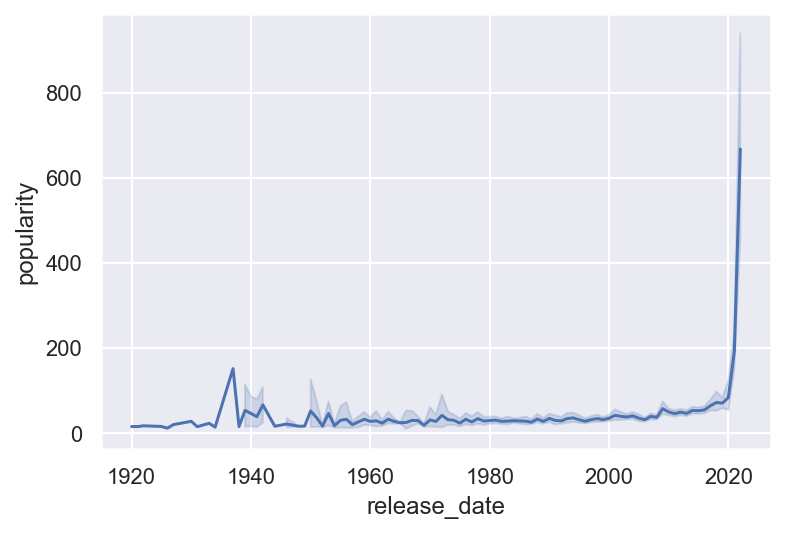

In [17]:
sns.lineplot(data = df_movies, y = 'popularity', x = df_movies['release_date'].dt.year)
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Efectivamente, se muestra que la popularidad de las películas crece  con la fecha del estreno, y que se produce un aumento dramático a partir del año 2020, situándose la media del último año entorno a 650. Esta circunstancia es importante ya que se ha de vigilar el tratamiento que se hace con los valores de la columna `popularity`.

Además de `popularity`, el *DataFrame* `df_movies` incluye las variables relacionadas directamente con el ***_éxito_***, que es el objetivo principal del análisis. Como punto de partida se visualizarán las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`, así como las relaciones entre ellas. Existen varias formas de hacerlo, pero *seaborn* permite mostrar toda la información en un solo gráfico.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 2</font>

Generar un figura con una matriz de gráficas en las que se muestre, para cada par de variables (de entre las cuatro mencionadas), una gráfica de dispersión; y para cada variable, un histograma.  Esta figura se puede hacer de manera sencilla mediante `seaborn.pairplot()` o `seaborn.PairGrid()`. Debido a que el conjunto de datos contiene información sobre casi 4000 películas, es necesario hacer ciertos ajustes sobre las gráficas de dispersión, como por ejemplo utilizar un tamaño reducido o transparencia para las marcas. 


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En este ejercicio hay que seleccionar las columnas de interés, y pasar el *DataFrame* resultante  a la función de *Seaborn* (se puede hacer en la misma llamada).
* Mediante `corner=True` se puede mostrar solo una parte de la matriz (que es simétrica). A veces es más claro así.
* Por otra parte, es posible pasar argumentos a las gráficas de la diagonal con el diccionario `diag_kws={'arg1':value1, 'arg2':value2,...}`; y a las gráficas bivariadas mediante el diccionario `plot_kws={'arg1':value1, 'arg2':value2,...}`.

</details>   




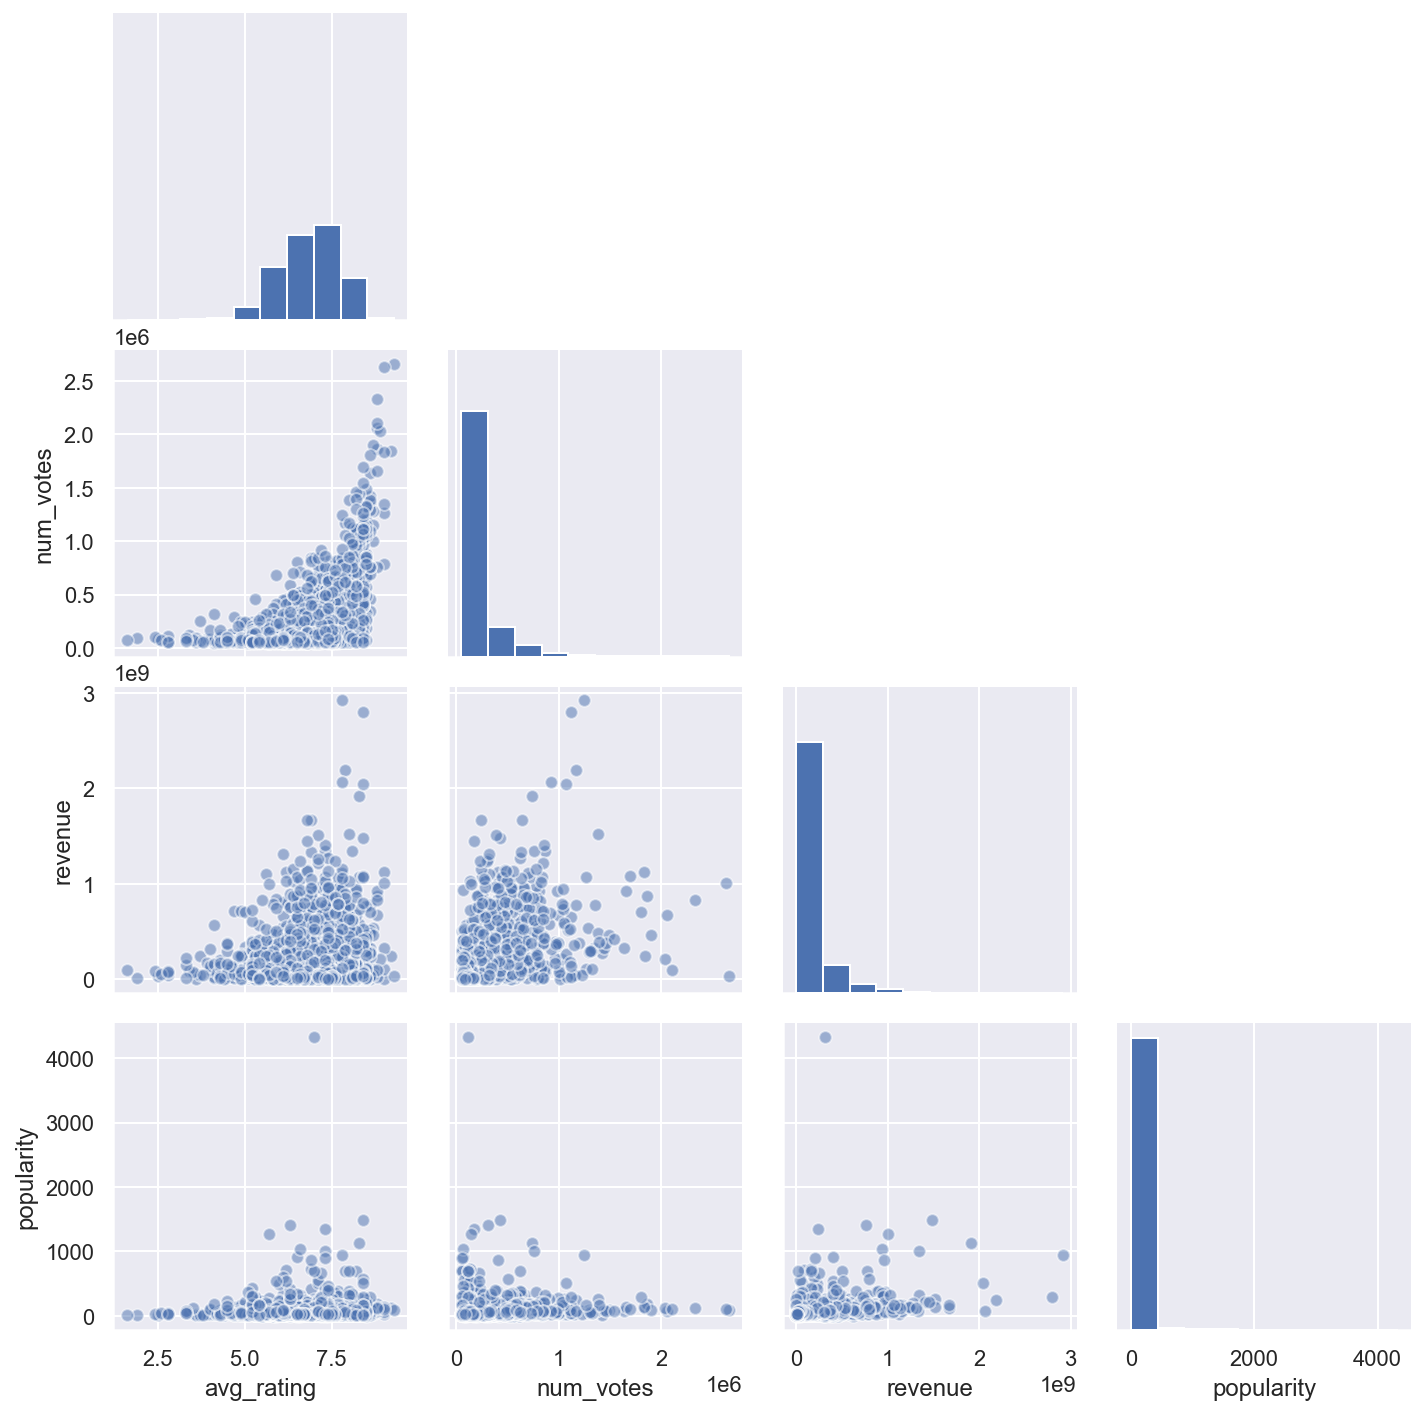

In [18]:
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity'] # Columnas relativas a la valoración

graph = sns.PairGrid(df_movies[success_meas], corner = True)
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter,edgecolor='w',s=40, alpha=0.5)
plt.show()

<!--comment -->

La gráfica anterior muestra que los valores de algunas variables (`num_votes`, `revenue`, y `popularity`) están muy sesgados, de modo que la mayoría se situan en la parte más baja del rango. Aún así, se percibe cierta relación entre `avg_rating` y `num_votes`, ya que parece que la gente tiende a votar más las películas que le gustan. También se percibe una relación similar, aunque menos fuerte, entre `avg_rating` y `revenue`. 



Aunque a priori no parece conveniente eliminar las películas con valores altos en `popularity`, los _outliers_  dificultan la visión tanto del histograma correspondiente como de las gráficas de dispersión.  Por tanto, se ha de repetir la gráfica, pero descartando las películas en las que `popularity` toma un valor extremadamente alto. Anteriormente se ha visto que, si bien la popularidad crece de forma pronunciada, la media en el último año se situa ligeramente por encima de 650. También que la diferencia crece de manera dramática a partir del cuantil 0.995. Por tanto, se almacenará este valor en la variable `pop_outlier_thresh`, y se utilizará como umbral.

In [19]:
pop_outlier_thresh = df_movies['popularity'].quantile(0.995)
pop_outlier_thresh

673.0064899999971

Repetir la gráfica elaborada en el ejercicio uno, pero descartando las filas correspondientes a valores de `popularity` mayores que `pop_outlier_thresh` (sin eliminarlos del *DataFrame* `df_movies`).

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al ejercicio anterior, pero hay que hacer una selección condicional de las filas cuya popularidad está por debajo del umbral `pop_outlier_thresh` y utilizar el *DataFrame* resultante para hacer la gráfica.
</details>   





In [20]:
df_graph = df_movies[success_meas]

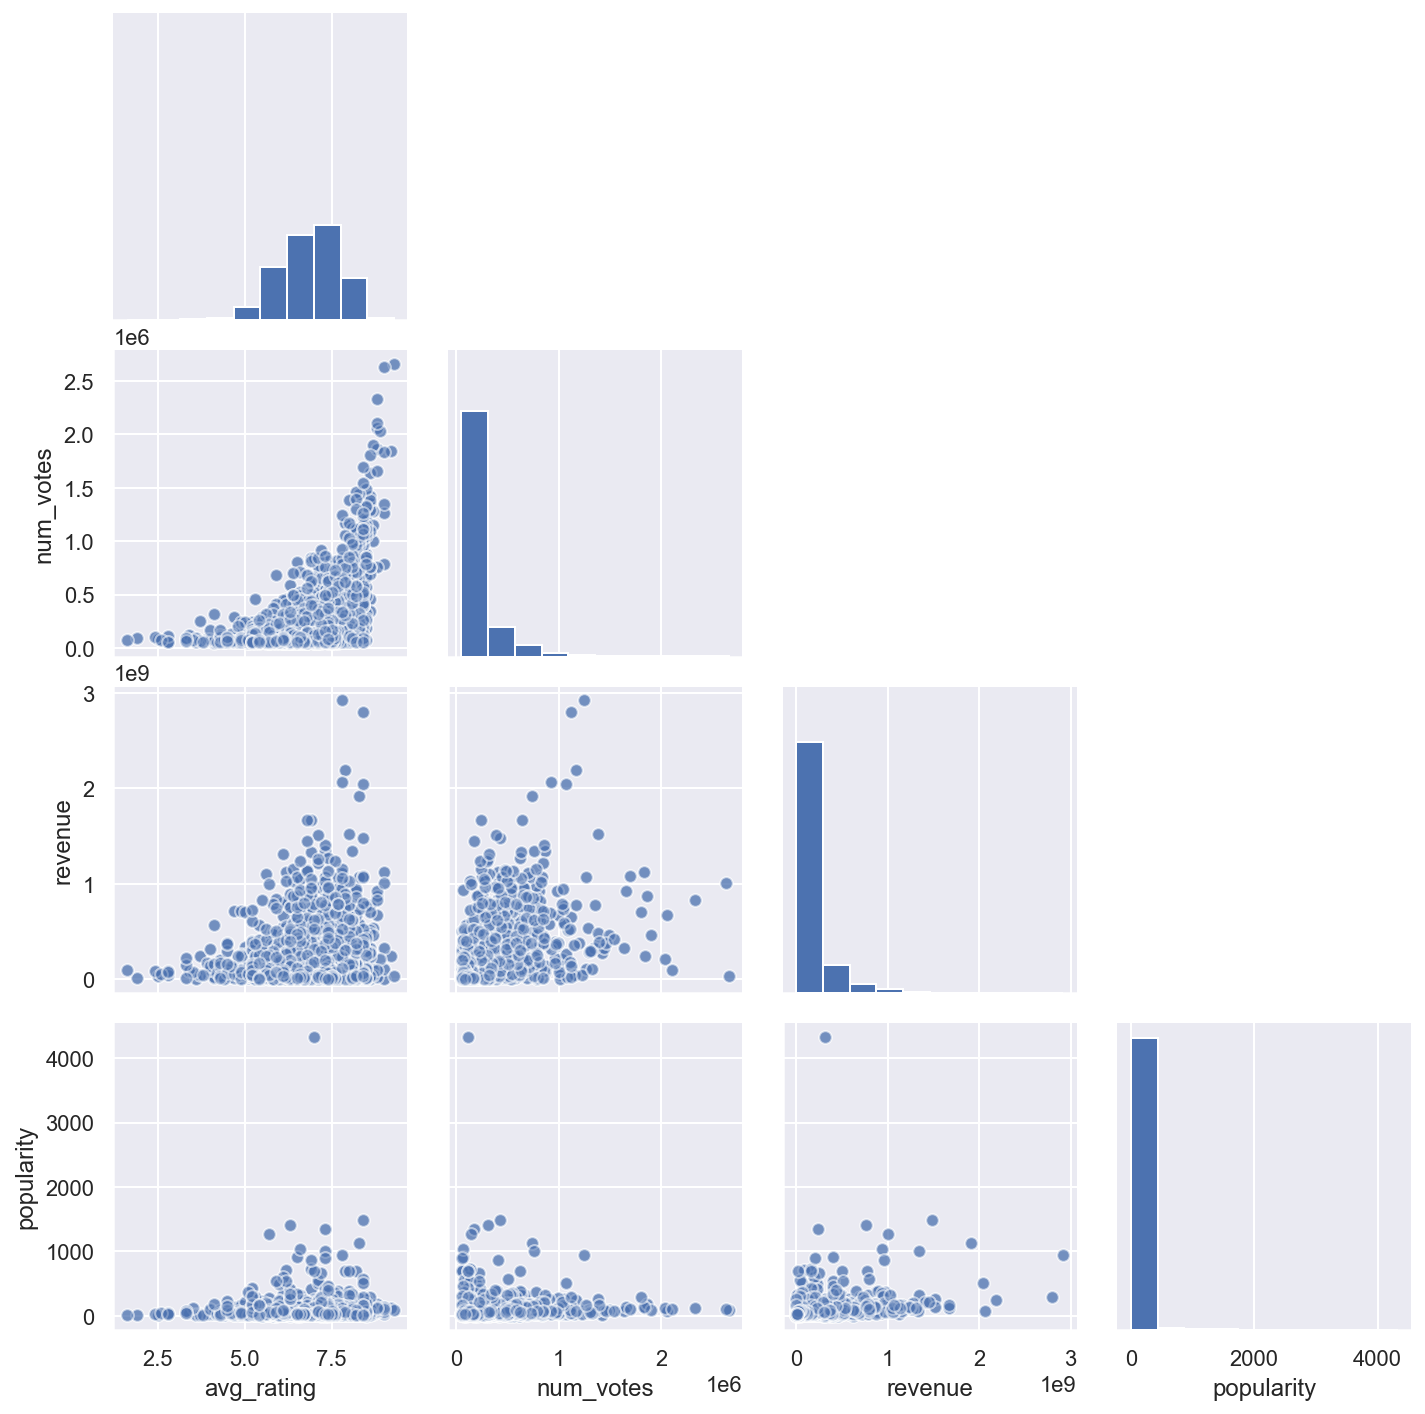

In [21]:
sns.PairGrid(df_graph[df_graph['popularity']<pop_outlier_thresh], corner = True)
graph.map_diag(plt.hist)
graph.map_offdiag(plt.scatter,edgecolor='w',s=40, alpha=0.5)
plt.show()

<!--comment -->

El descarte de los *outliers* permite ver ahora todas las gráficas con claridad. Parece que `num_votes`, y en mayor grado `revenue` guardan una ligera relación con `popularity`. Se aprecia que también que `avg_rating` se comporta de manera distinta, y que la relación con `popularity` es prácticamente nula. En cualquier caso, debido al gran número de puntos, y aunque se pueden intuir algunas tendencias, es difícil establecer hacer una valoración clara. En este caso, el coeficiente de correlación entre las variables puede ser proporcionar una visión más precisa. 




Obtener el coeficiente de correlación entre los pares de variable. Repetir la operación para los datos con y sin _outliers_ (en `popularity`) y comparar.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>

* Se puede utilizar `DataFrame.corr()`.
* Solo hay que seleccionar las columnas de interés (en `success_meas`) y aplicar el método al *DataFrame* resultante.
</details>   

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> `DataFrame.corr()` devuelve, a su vez, un *DataFrame*. El método `DataFrame.style.background_gradient()` muestra el conjunto de datos resultante con colores que facilitan su interpretación. 
</div>

Muestra la correlación incluyendo los *outliers*.

In [22]:
df_graph.corr().style.background_gradient()

,avg_rating,num_votes,revenue,popularity
avg_rating,1.000000,0.436970,0.063270,0.015133
num_votes,0.436970,1.000000,0.522712,0.174430
revenue,0.063270,0.522712,1.000000,0.370639
popularity,0.015133,0.174430,0.370639,1.000000


<!--comment -->

Muestra la correlación descartando los *outliers* en función del valor `pop_outlier_thresh`.

In [23]:
df_graph[df_graph['popularity']<pop_outlier_thresh].corr().style.background_gradient()

,avg_rating,num_votes,revenue,popularity
avg_rating,1.000000,0.436785,0.055288,-0.004984
num_votes,0.436785,1.000000,0.523690,0.314606
revenue,0.055288,0.523690,1.000000,0.491084
popularity,-0.004984,0.314606,0.491084,1.000000


<!--comment -->

Además, se considera que el presupuesto de las películas (`budget`) podría tener una incidencia definitiva en su difusión y, por tanto, en su éxito. Por ello se va a estudiar su relación con algunas de las variables anteriores. 

Obtener la correlación de `budget` con las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`. 



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Para hacer este ejercicio, solamente hay que acceder a las 5 columnas de interés y obtener la matriz de correlación. En este caso, solamente necesitamos los datos correspondientes a `budget` del resultado, por lo que se puede mostrar la columna correspondiente del *DataFrame*.
</details>   

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> A menos que se indique explícitamente, se trabajará con el conjunto de datos completos (sin eliminar _outliers_).
</div>

In [24]:
success_meas.append('budget')
df_graph = df_movies[success_meas]

df_graph.corr().style.background_gradient()

,avg_rating,num_votes,revenue,popularity,budget
avg_rating,1.000000,0.436970,0.063270,0.015133,-0.146861
num_votes,0.436970,1.000000,0.522712,0.174430,0.312072
revenue,0.063270,0.522712,1.000000,0.370639,0.706334
popularity,0.015133,0.174430,0.370639,1.000000,0.318876
budget,-0.146861,0.312072,0.706334,0.318876,1.000000


Efectivamente, el presupuesto tiene una correlación relativamente alta con los ingresos, a pesar de no tenerla (incluso es ligeramente negativa) con las valoraciones. Esto refleja la importancia de la promoción. También que las valoraciones tienden a ser más bajas (muy ligeramente) para películas de alto presupuesto (¿el público exige más?). 

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<br>
Los datos obtenidos muestran algunos factores de interés:

* Cuando se consideran todas las películas, la correlación más alta se da entre el número de votos (`num_votes`) y los ingresos de la película (`revenue`), lo cual es esperable: cuanta más gente ve una película, más gente tiende a votarla. La correlación entre la valoración de la película (`avg_rating`) y los ingresos (`revenue`) es nula. Esto hace pensar que la gente va a ver las películas por la promoción y la espectativa que levantan, independientemente de las críticas o las valoraciones. 


* Si se eliminan los _outliers_ de `popularity`, la relación entre esta variable y las demás cambia ligeramente. En concreto la popularidad ( `popularity`) parece relacionada de manera algo más fuerte con los ingresos (`revenue`). Esto bien podría deberse a que la popularidad de las novedades es mayor, mientras que la recaudación es menor por haber estado menos tiempo en taquilla. Al descartarlas, este fenómeno no afecta tanto.


* La valoración (`avg_rating`)  tiene cierta relación positiva con el número de votos (`num_votes`). Parece que la gente tiende a votar para expresar una valoración positiva.


* El presupuesto (`budget`) está muy relacionado con el beneficio (`revenue`).

Llegado a este punto, y considerando el objetivo inicial del estudio, nos centraremos principalmente en la variable `revenue` para medir la repercusión de la película (es proporcional a la gente que la ha visto), aunque también se estudiarán en algunos casos la valoración y número de votos.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Presupuesto</font>
<br>



<a id="section21"></a>
### <font color="#00586D"> 2.1 Presupuesto / ingresos  </font>
<br>

Los datos anteriores mostraban que la correlación entre el presupuesto (`budget`) y los ingresos (`revenue`) es positiva. Es posible estudiar con más en detalle esta relación. Un recurso interesante en este sentido es un gráfico de tipo `sns.joinplot()`, que dibuja una gráfica de dispersión de las dos variables, la distribución marginal de cada una de ellas y,  mediante el parámetro `kind='reg'` puede añadir la recta correspondiente a un modelo de regresión. 



#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 3</font>



Construir y analizar una gráfica `sns.joinplot()` con una recta de regresión entre las variables `budget` y `revenue`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Este tipo de gráficas permite pasar argumentos a la gráfica de dispersión. Cuando `kind='reg'`, `scatter_kws={'s':5, 'alpha':0.2}` haría que se dibujen los puntos con tamaño 5 y un gran nivel de transparencia, lo que permite apreciar densidades cuando el número de puntos es grande.
</details>  

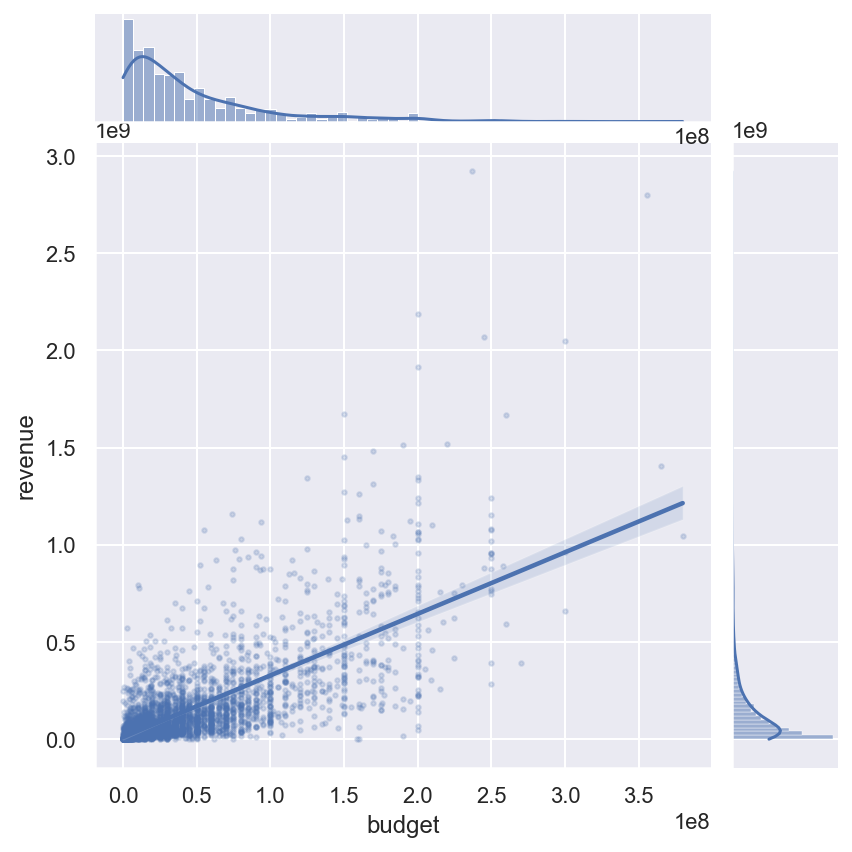

In [25]:
sns.jointplot(data=df_graph,x='budget',y='revenue',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<!--comment -->

Se aprecia cierta relación lineal entre `budget` y `revenue`. Sin embargo, la gráfica no permite determinar si esta relación es significativa.


Estimar un modelo de regresión lineal con `statsmodels` y mostrar los resultados. ¿Qué valor tiene el $R^2$? ¿Qué significa? ¿Se puede afirmar que existe una relación entre el presupuesto y el beneficio? ¿Por qué? 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
*  En las transparencias sobre regresión lineal (del módulo III) aparece un ejemplo de regresión univariada con `statsmodels`.
*  Existen valores perdidos en la columna `budget`. Esto implica que hay que fijar el parametro `missing='drop'` para `sm.OLS`.
* Se han de proporcionar respuestas a las preguntas en la celda correspondiente.
</details>  


In [26]:
df_b_r = df_movies[success_meas]

In [27]:
import statsmodels.api as sm

X = df_b_r['budget']
Y = df_b_r['revenue']

X = sm.add_constant(X)
model = sm.OLS(Y,X,missing = 'drop')

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     3357.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:07:38   Log-Likelihood:                -68539.
No. Observations:                3374   AIC:                         1.371e+05
Df Residuals:                    3372   BIC:                         1.371e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+07   3.78e+06      2.963      0.003    3.79e+06    1.86e+07
budget         3.1668      0.055     57.942      0.000       3.060       3.274
==============================================================================
Omnibus:                     2421.900   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84694.399
Skew:                           2.990   Prob(JB):                         0.00
Kurtosis:                      26.805   Cond. No.                     9.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<!--comment -->

El valor de 𝑅2 es 0.499, esto sugiere que existe una relación entre las variables. Pero solamente con este valor, no podemos determinar cuán de significativa es la relación. Para ello habría que fijarse en otras medidas como el p-valor, error estándar o intervalo de confianza, si nos fijamos podemos decir que existe una relación significativa entre las variables. 
<br><br><br>

<!--comment -->

Aunque el modelo establece que existe una relación lineal, se puede apreciar que está condicionada por los valores extremos de  `revenue`. Además parece que la varianza en esta variable aumenta cuando lo hace `budget`. 



Comprobar esta circunstancia con una gráfica de tipo `sns.residplot()`.

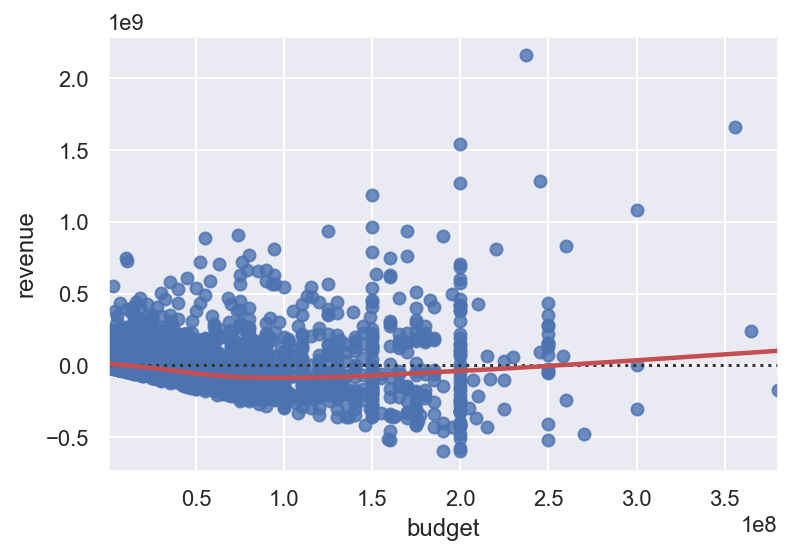

In [28]:
sns.residplot(data=df_b_r, x="budget", y="revenue", lowess=True, line_kws=dict(color="r"))
plt.show()

<!--comment -->

Efectivamente, la varianza de `revenue` aumenta conforme aumenta `budget`, es decir, no se cumple la condición de homocedasticidad, por lo que los intervalos de confianza y p-valores asociados al modelo de regresión ***no tienen validez estadística*** aunque sí permiten intuir la relación entre las variables.

Por otra parte, llama la atención que existen varios puntos que rompen claramente las tendencias, ya que existen varias películas que obtuvieron unos ingresos significativamente por encima de las demás, junto con algún fracaso que, pese al alto presupuesto, no generó los ingresos esperados. 

Obtener la información (título, presupuesto y fecha de estreno) relativa a las cinco películas con más presupuesto.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Existe un método que permite obtener *directamente* los *n* mayores elementos dada una columna.
</details> 

In [29]:
df_movies.nlargest(5,'budget')

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt1298650,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,528124,380000000.0,1045713802,2011-05-14,en,205.013,"england,spain,sea,captain,mutiny,sword,prime m..."
tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,859487,365000000.0,1405403694,2015-04-22,en,214.351,"artificial intelligence,sequel,superhero,based..."
tt4154796,Avengers: Endgame,"Action,Adventure,Drama",8.4,1116190,356000000.0,2797800564,2019-04-24,en,298.118,"space travel,time travel,time machine,sequel,s..."
tt0449088,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy",7.1,651072,300000000.0,961000000,2007-05-19,en,164.916,"exotic island,east india company,love of one's..."
tt0974015,Justice League,"Action,Adventure,Fantasy",6.1,452353,300000000.0,657926987,2017-11-15,en,126.762,"superhero,based on comic,super power,superhero..."


<!--comment -->

Obtener la información (título, ingresos y fecha de estreno) relativa a las diez películas con más ingresos.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Existe un método que permite obtener *directamente* los *n* mayores elementos dada una columna.
</details>  


In [30]:
df_movies.nlargest(5,'revenue')

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0499549,Avatar,"Action,Adventure,Fantasy",7.8,1243973,237000000.0,2920357254,2009-12-15,en,936.245,"culture clash,future,space war,space colony,so..."
tt4154796,Avengers: Endgame,"Action,Adventure,Drama",8.4,1116190,356000000.0,2797800564,2019-04-24,en,298.118,"space travel,time travel,time machine,sequel,s..."
tt0120338,Titanic,"Drama,Romance",7.9,1165985,200000000.0,2187463944,1997-11-18,en,237.839,"drowning,evacuation,shipwreck,iceberg,forbidde..."
tt2488496,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Sci-Fi",7.8,927896,245000000.0,2068223624,2015-12-15,en,77.723,"android,spacecraft,space opera"
tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.4,1069019,300000000.0,2046239637,2018-04-25,en,505.258,"magic,sacrifice,superhero,based on comic,space..."


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Hay algunas películas entre las cinco con mayor presupuesto que no aparecen entre las diez con más ingresos.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section22"></a>
### <font color="#00586D"> 2.2 La fecha de estreno como factor de interés  </font>
<br>

Aunque la correlación entre presupuesto y los ingresos corresponde con lo que cabe esperarse (más presupuesto implica también más publicidad), hay que considerar que ambos factores dependen fuertemente del año de estreno, ya que se están manejando datos que corresponden a épocas distintas. Para tener una idea de la importancia de este factor, es necesario visualizar como evolucionan ambas cantidades a lo largo de los años.




#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 4</font>

Agrupar las películas en función del año de estreno, y calcular la media de presupuesto e ingresos para cada grupo. Para ello, se utilizará la función `DataFrame.groupby()`, y se almacenará el resultado (la media para `budget` y para `revenue` de cada año) en un *DataFrame* que se denominará `df_bud_rev_year`.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Como se ha visto anteriormente, los valores de tipo `TimeStamp` tienen un campo, denominado `year` que contiene el año. 
* Mediante `df_movies['release_date'].dt.year` se puede acceder a la serie de años y utilizarla para hacer la agrupación (recordad que a `DataFrame.groupby()` se le puede pasar una *Serie* en lugar de un nombre de columna).  
* Para que el resultado sea correcto, la agrupación se ha de hacer sobre `df_movies.dropna()`.
</details>  

In [31]:
df_bud_rev_year = df_movies.groupby(df_movies['release_date'].dt.year)[['budget','revenue']].mean(numeric_only=True).dropna()

In [32]:
df_bud_rev_year.head()

,budget,revenue
release_date,,
1920,18000.0,8811.0
1921,250000.0,2500000.0
1925,923000.0,2022550.0
1926,750000.0,1000000.0
1927,1300000.0,650422.0


<!--comment -->

 Dibujar la gráfica a partir de la información (dos columnas) que contiene el `DataFrame` `df_bud_rev_year`.
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer directamente con `sns.lineplot()`
</details>  

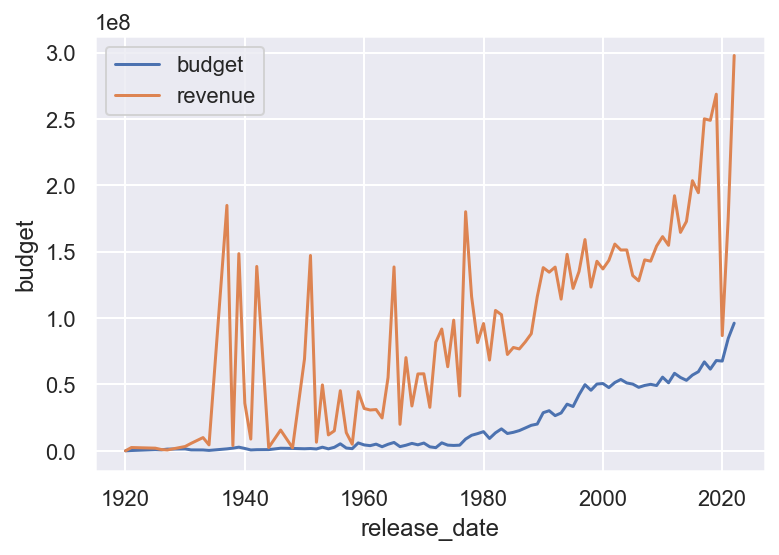

In [33]:
sns.lineplot(data = df_bud_rev_year, y = 'budget', x = df_bud_rev_year.index, label='budget')
sns.lineplot(data = df_bud_rev_year, y = 'revenue', x = df_bud_rev_year.index, label='revenue')
plt.show()

<!--comment -->

En la gráfica se pueden visualizar varios fenómenos:
* Tanto los presupuestos como los beneficios crecen cada año.
* La línea de beneficios es más irregular que la de presupuesto.
* Los beneficios parecen crecer más que los presupuestos, sobre todo en los últimos años.
* Los beneficios cayeron de forma dramática el primer año de la pandemia. 
* Se aprecian seis anomalías importantes anteriores a 1980, en las que se aprecia que los ingresos medios se separan ampliamente de la tendencia. 



Obtener los años a los que corresponden estas entradas. Para ello, pueden obtenerse los 6 mayores valores anteriores a 1980, en el _DataFrame_ `df_bud_rev_year`.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El *DataFrame* está indexado y ordenado por años, por lo que se puede acceder directamente a las filas de interés.
* Se trata de obtener 6 filas con mayor valor en la columna `revenue`.
</details>  

In [34]:
df_filtered = df_bud_rev_year.loc[df_bud_rev_year.index < 1980]

df_sorted = df_filtered.sort_values(by='revenue')
top_six = df_sorted.tail(6)
top_six

,budget,revenue
release_date,,
1965,6325000.0,1.385671e+08
1942,868000.0,1.389548e+08
1951,1748750.0,1.472125e+08
1939,2759000.0,1.485692e+08
1977,8900000.0,1.801678e+08
1937,1488423.0,1.849255e+08


<!--comment -->

En 1937, 1939, 1942, 1951, 1965 y 1977 se producen las alteraciones más importantes de la serie.



Extraer los datos de las películas correspondientes a estos años y almacenarlos en un _DataFrame_ denominado `df_anomalies`. Dibujar un gráfico de barras horizontal con los ingresos de cada película. Las etiquetas en el eje `y` deben contener el título de la películas y, entre paréntesis, el año de estreno.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Para hacer este ejercicio, primero hay que crear  `df_anomalies` mediante selección condicional con `Series.dt.year` y utilizando el método `Series.isin()`.
* Para hacer la gráfica se puede utilizar el método `plt.barh()` de *matplotlib*.
* Cuando hay muchas categorías, o los nombres de éstas son largos, es conveniente que la gráfica sea horizontal.
</details>  

In [35]:
df_anomalies = df_movies[df_movies['release_date'].dt.year.isin(top_six.index)]

In [36]:
df_anomalies.head()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0029583,Snow White and the Seven Dwarfs,"Adventure,Animation,Family",7.6,200177,1488423.0,184925486,1937-12-21,en,150.919,"poison,dwarf,witch,becoming an adult,sadness,q..."
tt0031381,Gone with the Wind,"Drama,Romance,War",8.2,315675,4000000.0,402352579,1939-12-15,en,30.056,"southern usa,loss of loved one,based on novel ..."
tt0031679,Mr. Smith Goes to Washington,"Comedy,Drama",8.1,116086,1500000.0,9600000,1939-10-19,en,14.335,"washington dc, usa,senate,senator,sightseeing,..."
tt0032138,The Wizard of Oz,"Adventure,Family,Fantasy",8.1,399394,2777000.0,33754967,1939-08-15,en,113.698,"witch,adolescence,based on novel or book,secre..."
tt0034492,Bambi,"Adventure,Animation,Drama",7.3,143873,858000.0,267447150,1942-02-11,en,107.562,"loss of loved one,forest,deer,coming of age,be..."


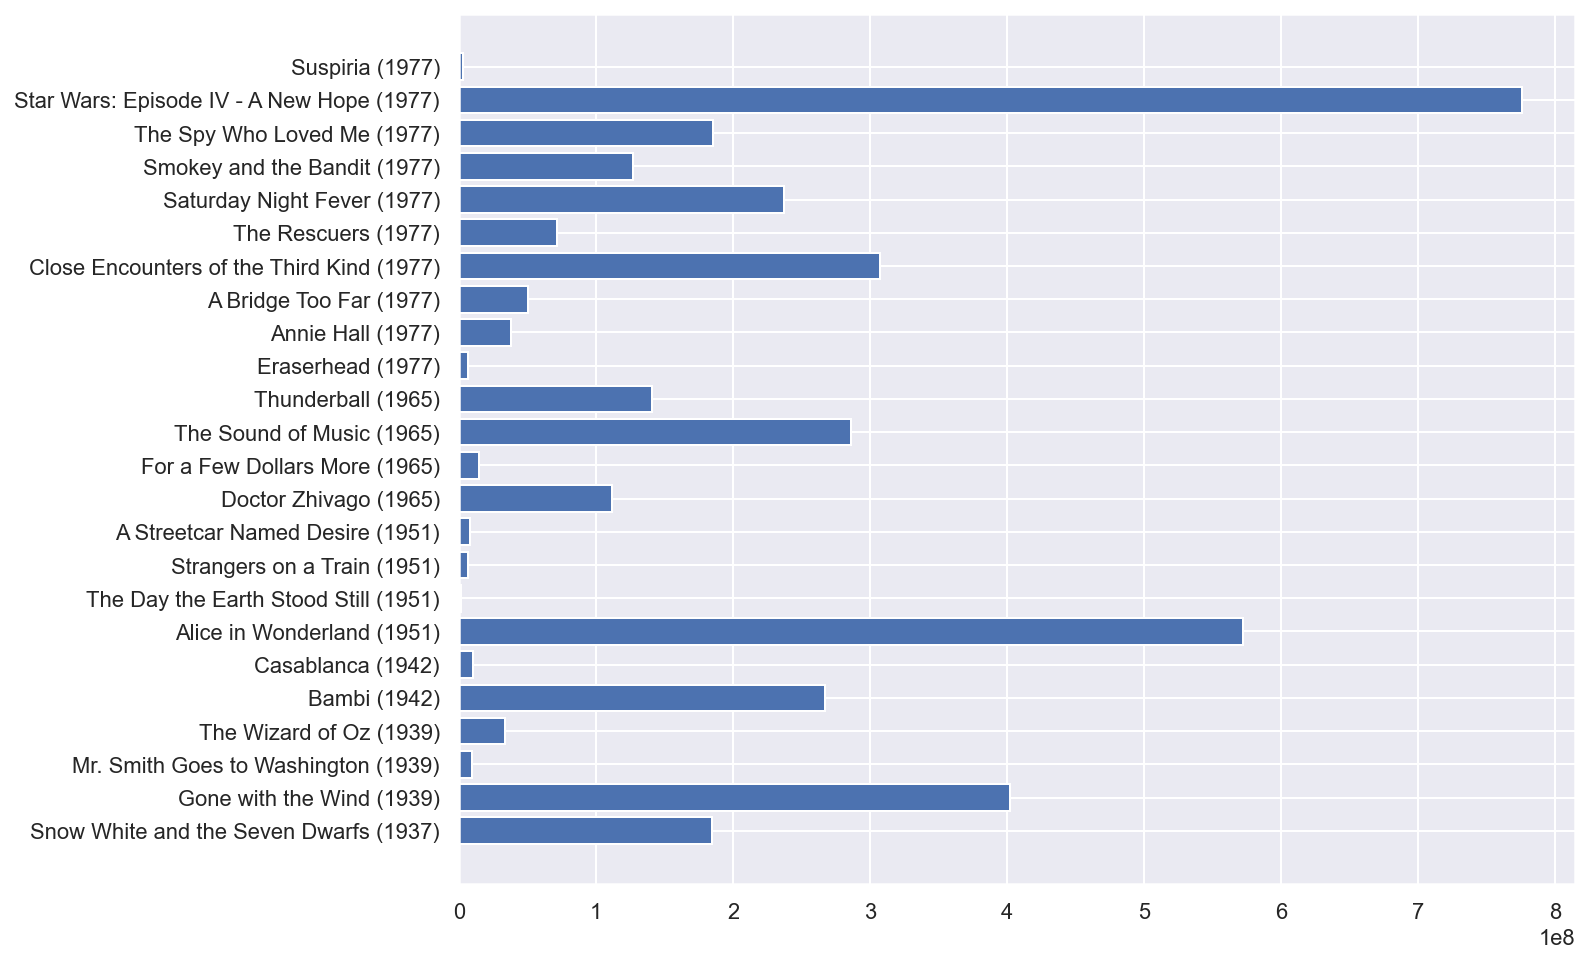

In [37]:
years = df_anomalies['release_date'].dt.year.astype(str)
y = df_anomalies['title']+' '+'('+years+')'
plt.figure(figsize=(10,8))
plt.barh(y,df_anomalies['revenue'])
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que estas anomalías se deben a películas concretas como "_Gone with the wind_" ("Lo que el viento se llevó"), "_Alice in Wonderland_" ("Alicia en el país de las maravillas") y, sobre todo, "_Star Wars_". También hay otras como "_Close Encounters with the Third Kind"_ ("Encuentros en la tercera fase"), o algunas otras de animación como "Bambi" y "_Snow White and the Seven Dwarfs_" ("Blancanieves y los siete enanitos").

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


### <font color="#00586D"> Conclusión</font>
<br>

Como resumen hasta ahora puede establecerse que, efectivamente, el presupuesto está muy relacionado con los ingresos. Con respecto a la valoración, sin embargo, se había visto en la sección anterior que no parece que haya una relación relevante, lo que constituye el hallazgo que, a priori, podría resultar contrario a nuestra intuición. 

Además, hay una variable _latente_ que condiciona los ingresos: la fecha de estreno. Para estudiar la repercusión de otros factores se hace necesario tener en cuenta esta circunstancia. Existen varias posibilidades. 

* Corregir los ingresos y beneficio en función del año, eliminando el efecto de la tendencia.
* Estudiar distintos periodos de tiempo por separado. 
* Hacer el estudio para franjas de prespuesto específicas. 
* Calcular el porcentaje o ratio de ingresos con respecto al presupuesto. 

Debido esto, y al objetivo del estudio (producción de una película de presupuesto relativamente bajo), se considerarán películas más actuales. Además, desde el año 2000 en adelante se observa que el crecimiento del presupuesto es algo más lento, por lo que se ha decidido centrar el estudio en películas estrenadas a partir de esa fecha. Además, se trabajará también con el ratio recaudación/presupuesto.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Cuando se trabaja con datos temporales, se suele eliminar la tendencia o la estacionalidad. En este proyecto no se trabajará a ese nivel, ya que estos conceptos se tratarán en el módulo VII.
</div>

In [38]:
df_movies = df_movies[df_movies['release_date']>='2000']

In [39]:
df_movies.head()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0035423,Kate & Leopold,"Comedy,Fantasy,Romance",6.4,85214,48000000.0,76019048,2001-12-25,en,14.495,"new york city,love of one's life,duke,time tra..."
tt0118694,In the Mood for Love,"Drama,Romance",8.1,150051,150000.0,12854953,2000-09-29,cn,24.273,"adultery,lovesickness,martial arts,newspaper,h..."
tt0120630,Chicken Run,"Adventure,Animation,Comedy",7.1,193199,45000000.0,224834564,2000-06-21,en,56.776,"chicken,northern england,freedom,yorkshire,sto..."
tt0120667,Fantastic Four,"Action,Adventure,Fantasy",5.7,330945,100000000.0,333535934,2005-06-29,en,35.381,"flying,sibling relationship,fire,marriage prop..."
tt0120679,Frida,"Biography,Drama,Romance",7.3,90429,12000000.0,56298474,2002-08-29,en,18.972,"painter,mexico,love of one's life,bisexuality,..."


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Géneros</font>
<br>

En la base de datos original, `df_movies`, los géneros de cada película aparecen como una lista separada por comas en la columna `genres`. Para poder estudiar la repercusión de este factor, es necesario llevar a cabo una **transformación** que permita operar de manera ágil. Dado que el número de géneros es limitado y reducido, es posible utilizar variables identificadoras (_dummy_).  _Otra posibilidad_ consiste en crear un conjunto de datos auxiliar, `df_genres`, en formato _long form_, en el que cada fila corresponda a un par película-género, y hacer las uniones correspondientes con`df_movies`.  

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> Podéis ir ejecutando cada sentencia por separado y ver el resultado para entender mejor el proceso.

In [40]:
# Crea las variables dummy para indicar qué género aparece en cada película.
df_genres = df_movies['genres'].str.get_dummies(',').astype(bool)
df_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
tt0035423,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
tt0118694,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
tt0120630,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tt0120667,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
tt0120679,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9620292,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
tt9639470,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
tt9731534,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [41]:
# Almacena los nombres de los  géneros en una lista.
genres = df_genres.columns.to_list()
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [42]:
# Convierte la matriz a formato "long form"
df_genres = (df_genres.reset_index()
                      .melt(id_vars='movie_id', value_vars=genres, var_name='genre', value_name='ind')
                      .set_index('movie_id'))
df_genres

,genre,ind
movie_id,,
tt0035423,Action,False
tt0118694,Action,False
tt0120630,Action,False
tt0120667,Action,True
tt0120679,Action,False
...,...,...
tt9620292,Western,False
tt9639470,Western,False
tt9731534,Western,False


In [43]:
# Filtra 
df_genres = df_genres[df_genres['ind']==True]
# Borra la columna indicador
del df_genres['ind']
df_genres

,genre
movie_id,
tt0120667,Action
tt0120737,Action
tt0120755,Action
tt0120804,Action
tt0120903,Action
...,...
tt2404435,Western
tt2557490,Western
tt2910904,Western


In [44]:
# Muestra las entradas correspondientes a la película "Avatar" (Adventure, Action, Fantasy)
df_genres.loc['tt0499549']

,genre
movie_id,
tt0499549,Action
tt0499549,Adventure
tt0499549,Fantasy


Además, se descartarán las columnas de `df_movies` que no se utilizarán.

In [45]:
df_movies = df_movies[['title','avg_rating', 'num_votes', 'budget', 'revenue', 'popularity', 'release_date']]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 5</font>

A partir del *DataFrame* `df_genres`, es posible visualizar con qué frecuencia aparecen los géneros.  Dibujar un gráfico de barras que muestre el número de entradas correspondientes a cada valor de `genre` en el *DataFrame* `df_genres`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer la gráfica directamente con `Seaborn.catplot()`.
* Cuando existen muchas categorías o el nombre es largo, puede convenir que el gráfico sea horizontal. Para hacerlo, hay que representar la variable categórica en el eje *y*.
</details>  

In [46]:
df_genres.head()

,genre
movie_id,
tt0120667,Action
tt0120737,Action
tt0120755,Action
tt0120804,Action
tt0120903,Action


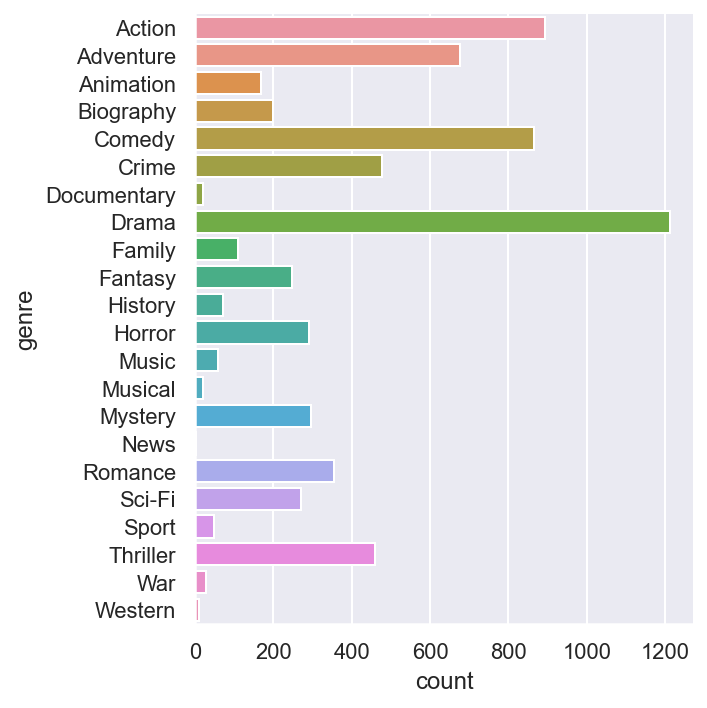

In [47]:
sns.catplot(kind="count", y="genre", data=df_genres)
plt.show()

<!--comment -->

Parece que el drama es, de largo, el género que tratan más películas. Le siguien la acción y la comedia.



 Mostrar la distribución de popularidad por género con un gráfico de cajas (horizontal). Esto requiere utilizar información de `df_genres` (género) y de `df_movies` (popularidad).
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Analizar la información por género implica fundir el *DataFrame* `df_genres`con `df_movies['popularity']`, preservando todas las entradas de `df_genres`(es necesario fundir por índice con `on='movie_id'`, y especificar adecuadamente el valor para el parámetro `how`).
    
* Los outliers de `popularity` hacen que no se vea bien la gráfica, por lo que es conveniente hacer selección condicional sobre `df_movies` (utilizando `prop_outlier_thresh`) antes de la fusión. 
    
* El nuevo *DataFrame* se puede visualizar como un gráfico de cajas directamente con *Seaborn*.
    
* Por otra parte, para mejorar la visualización se puede jugar con el aspecto (`aspect`), el tamaño de las líneas `linewidth`, o el tamaño de los puntos que representan los *outliers* (`fliersize`).
    
* No es necesario hacerlo todo en una llamada (aunque se puede), y se puede crear un *DataFrame* intermedio.
</details>  

In [48]:
df_movies_popu = df_movies['popularity'].loc[df_movies['popularity']<pop_outlier_thresh]
df_movies_popu = df_movies_popu.to_frame(name='popularity')
df_movies_popu.head()

,popularity
movie_id,
tt0035423,14.495
tt0118694,24.273
tt0120630,56.776
tt0120667,35.381
tt0120679,18.972


In [49]:
df_genr_mov = pd.merge(df_genres,df_movies_popu,on='movie_id',how='left')
df_genr_mov.head()

,genre,popularity
movie_id,,
tt0120667,Action,35.381
tt0120737,Action,174.375
tt0120755,Action,34.975
tt0120804,Action,32.089
tt0120903,Action,3.069


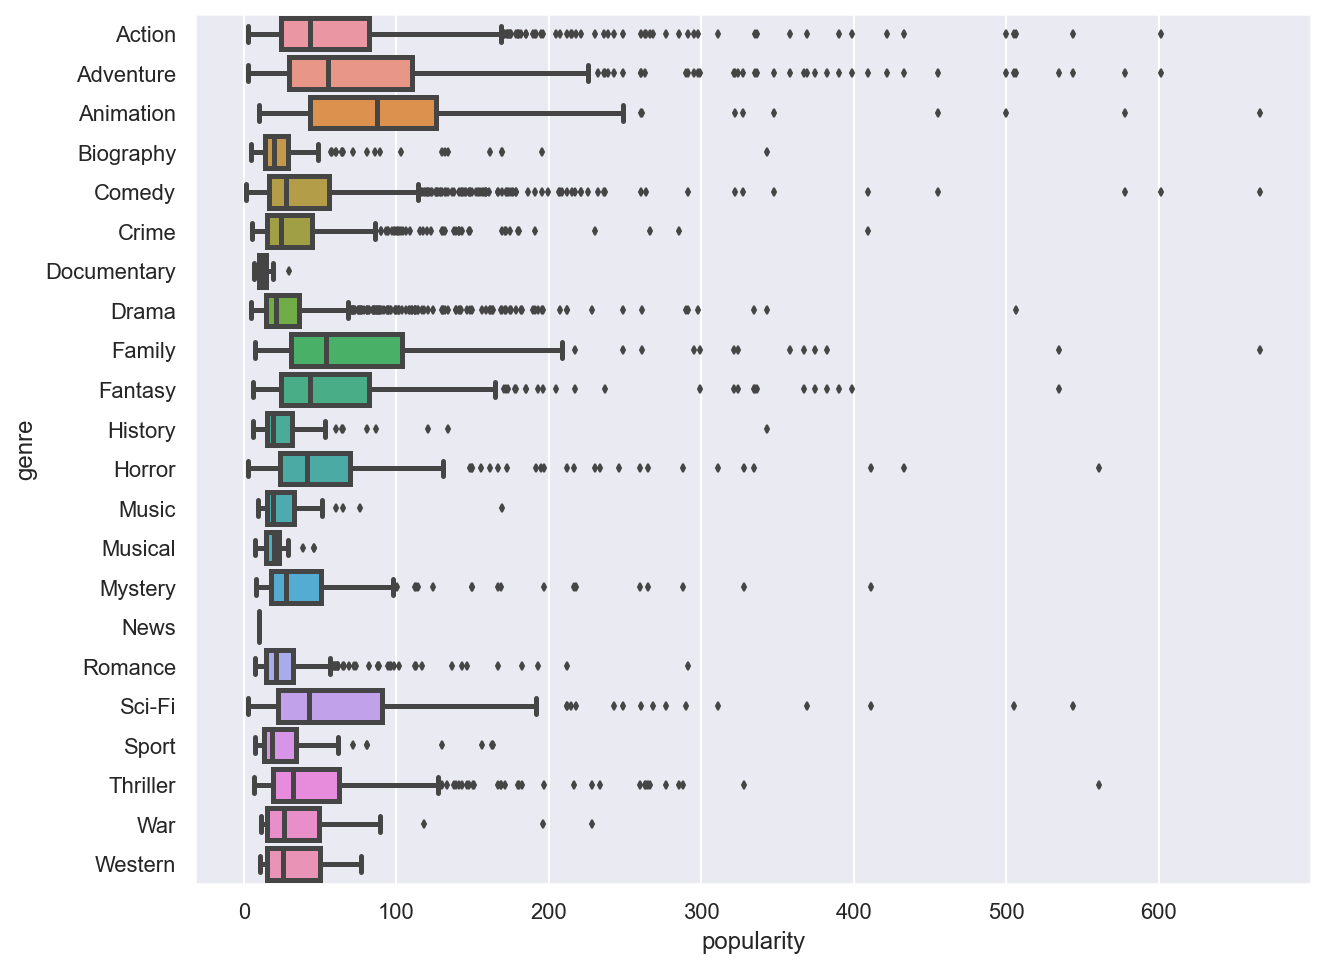

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x="popularity", y="genre", data=df_genr_mov, linewidth=2.5, fliersize=2.5)
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 6</font>

Para explorar la relación entre presupuestos e ingresos en función del género, debido a que las distribuciones están sesgadas, también se utilizarán gráficas del tipo `sns.boxplot()`. Como paso previo, y para facilitar la exploración, se pueden ordenar los géneros en función de la ___mediana___ de los ingresos obtenidos (`revenue`) por las películas correspondientes. Este orden se almacenará en la lista `ordered_genres`.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El primer paso consiste en fundir `df_genres` con `df_movies['revenue']`.
    
* El *DataFrame* resultante se ha de agrupar según la columna `genre`. 
    
* Posteriormente se ha de acceder a la columna `'revenue'` de la agrupación, y devolver la mediana. 
    
* La serie resultante se puede ordenar y posteriormente se puede devolver el índice de la misma (que preserva el orden).
    
* No es necesario hacerlo todo en una llamada (aunque se puede)
</details> 

In [51]:
ordered_genres = (
                    pd.merge(df_genres,df_movies['revenue'],on='movie_id',how='left')
                      .groupby('genre')['revenue'].mean()
                      .sort_values(ascending=False)
)
print(ordered_genres)

genre
Animation      3.846900e+08
Adventure      3.581661e+08
Family         3.152812e+08
Sci-Fi         2.896956e+08
Fantasy        2.649715e+08
Action         2.470563e+08
Musical        1.710402e+08
Comedy         1.625340e+08
Thriller       1.329165e+08
Western        1.287991e+08
Music          1.050624e+08
History        1.046296e+08
Drama          1.036777e+08
Crime          1.024464e+08
Romance        1.013973e+08
Mystery        9.663963e+07
Biography      9.278454e+07
War            9.198790e+07
Horror         9.131649e+07
Sport          7.587186e+07
News           4.624300e+07
Documentary    4.557328e+07
Name: revenue, dtype: float64


<!--comment -->

 Dibujar un gráfico de cajas y bigotes con el beneficio por género, utilizando el orden entre géneros almacenado en `ordered_genres`.
 
  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El primer paso consiste en fundir `df_genres` con `df_movies['revenue']`.
    
* Se puede hacer la gráfica directamente con `Seaborn.catplot()` a partir del *DataFrame* resultante.
    
* Para pasar el orden de las cajas puede utilizarse el parámetro `order=ordered_genres`.
    
* Por otra parte, pueden cambiarse los colores de la gráfica, por ejemplo, con `palette="flare"`, que es una paleta secuencial.
    
* También se deben rotar las etiquetas del eje *x* con `plt.xticks()`.
    
* No es necesario hacerlo todo en una llamada (aunque se puede)
</details> 

In [52]:
df_gen_rev = pd.merge(df_genres,df_movies['revenue'],on='movie_id',how='left')

In [53]:
df_gen_rev.head()

,genre,revenue
movie_id,,
tt0120667,Action,333535934
tt0120737,Action,871368364
tt0120755,Action,546388105
tt0120804,Action,102984862
tt0120903,Action,296339527


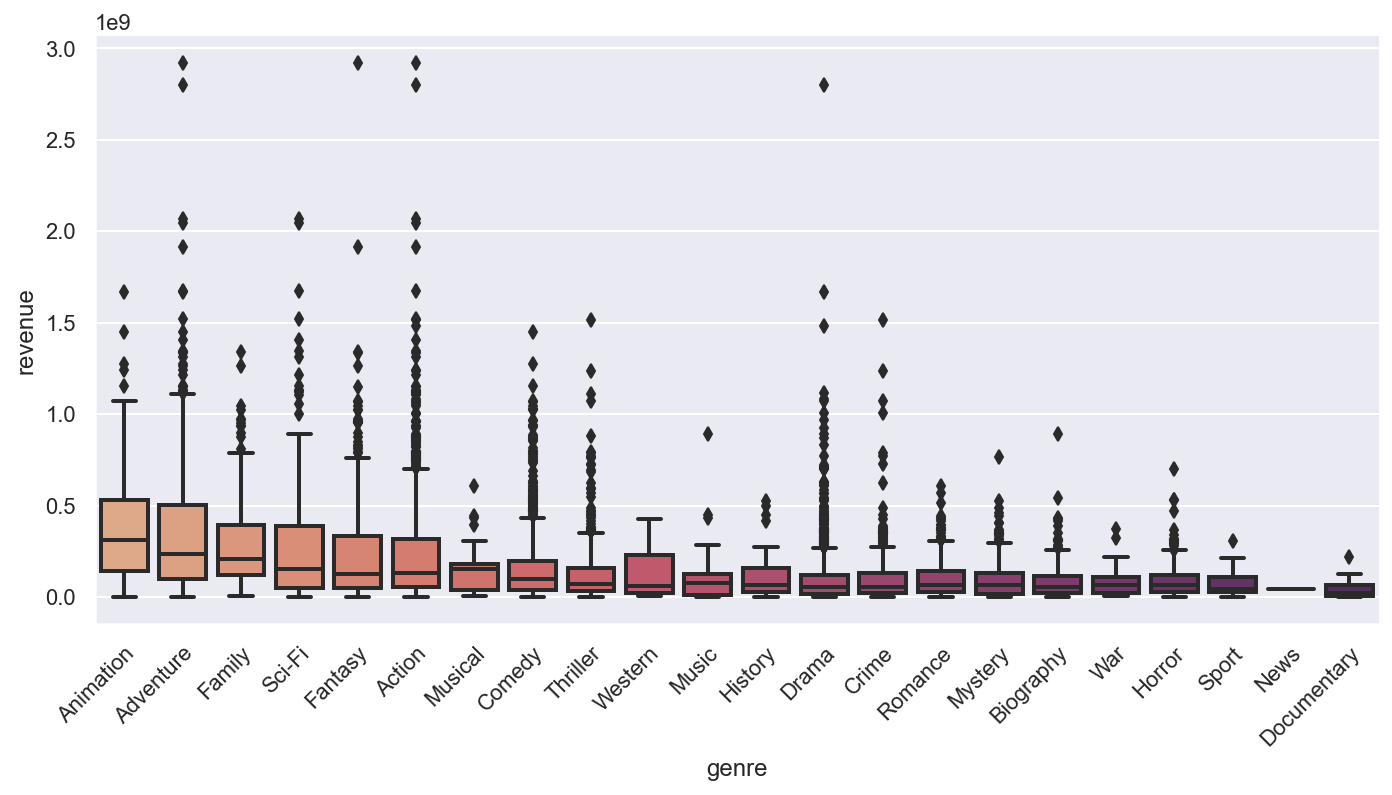

In [54]:
sns.catplot(x="genre", y="revenue", data=df_gen_rev, kind='box',order=ordered_genres.index, palette="flare",height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()

<!--comment -->

Puede apreciarse que las películas de animación, aventuras, familia y ciencia ficción, son los géneros que más recaudan. Los que menos, las noticias, los deportes y los documentales. Es curioso, aunque puede estar relacionado, que el drama es el género más frecuente y es uno de los que menos recauda.
<br>




Anteriormente se comprobó la importancia del presupuesto en la recaudación. Por tanto, es interesante también estudiar si la relación de las recaudaciones por género se refleja también en los presupuestos.   Elaborar una gráfica similar a la anterior en la que se muestre el presupuesto por géneros. Para comparar, puede ser de utilidad mantener el mismo orden en la representación utilizado anteriormente (la mediana de los ingresos).


  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Es ***idéntico*** al anterior. Solo hay que utilizar la columna `revenue` por `budget` en la gráfica.
    
* En este caso, el uso de la paleta `flare` puede distorsionar la percepción de la grafica ya que hace percibir más orden del que realmente hay. Utilizar un color solamente. Por ejemplo, un tono de gris claro con `color='.95'`.
</details> 

In [55]:
df_gen_bud = pd.merge(df_genres,df_movies['budget'],on='movie_id',how='left')

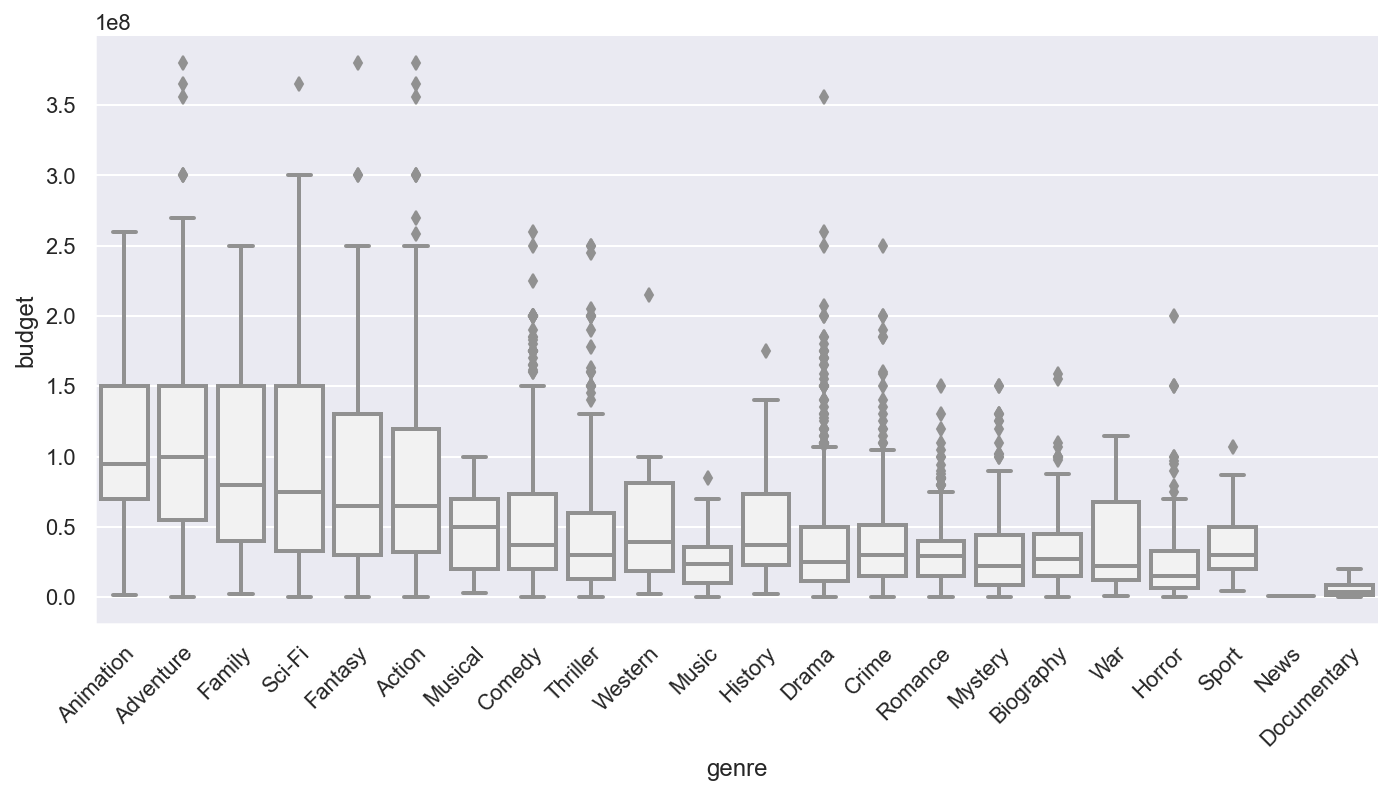

In [56]:
sns.catplot(x="genre", y="budget", data=df_gen_bud, kind='box',order=ordered_genres.index,color='.95' ,height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se aprecian algunos cambios menores.  No obstante, la tendencia general, es que los géneros que producen más ingresos son también los que más presupuesto reciben. 

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Personas</font>
<br>

Una vez estudiados los géneros, va a estudiarse si el director y el reparto tienen relación con la rentabilidad de las películas. El _DataFrame_ `df_credits` contiene la relación de personas que participan en cada película y en calidad de qué. Por otra parte, el _DataFrame_ `df_people` contiene la información relativa a cada persona, incluyendo su nombre.







<a id="section41"></a>
### <font color="#00586D"> 4.1 Directores</font>
<br>

Interesa obtener información sobre los ingresos que producen los directores,  sobre su popularidad y la relación de ambos factores.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 7</font> 


Elaborar una gráfica `sns.jointplot()` para comprobar si existe correlación entre los ingresos de las películas y la popularidad de su director. Esto implica utilizar datos de `df_credits`, de `df_people[popularity]` y de `df_movies['revenue']`) por lo que hay que hacer dos fusiones. El resultado de estas se debe almacenar en un *DataFrame* denominado `df_dir_pop_rev`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En primer lugar, hay que hacer selección condicional sobre `df_credits`, de modo que se seleccionen las filas en las que `rol` sea `director`.
* El resultado se ha de fundir con `df_people['popularity']` utilizando `people_id` como clave de unión.
* El resultado se ha de fundir a su vez con `df_movies['revenue']` utilizando `movie_id` como clave de unión.
* En los dos casos hay que ser consciente de cómo (`how`) se hace la unión. Se ha de tener en cuenta que muchas películas en `df_credits` no están en `df_movie`. Esto puede (según se haga la unión) generar *NaN* que hay que eliminar.
* La gráfica se puede mostrar directamente. Conviene utilizar transparencia para poder apreciar densidades.
</details>  


In [57]:
df_credits.head()

,people_id,movie_id,rol
0,2991,tt0010323,director
1,13848,tt0012349,director
2,9076,tt0013442,director
3,8635,tt0015324,director
4,9603,tt0015648,director


In [58]:
df_credits_dir = df_credits.query('rol == "director"')

In [59]:
df_dir_pop = pd.merge(df_credits_dir,df_people['popularity'],on='people_id',how='left')

In [60]:
df_dir_pop_rev = pd.merge(df_dir_pop,df_movies['revenue'],on='movie_id',how='right')

In [61]:
df_dir_pop_rev.head()

,people_id,movie_id,rol,popularity,revenue
0,366,tt0035423,director,8.683,76019048
1,12453,tt0118694,director,8.558,12854953
2,7314,tt0120630,director,2.107,224834564
3,53304,tt0120630,director,1.459,224834564
4,20400,tt0120667,director,2.118,333535934


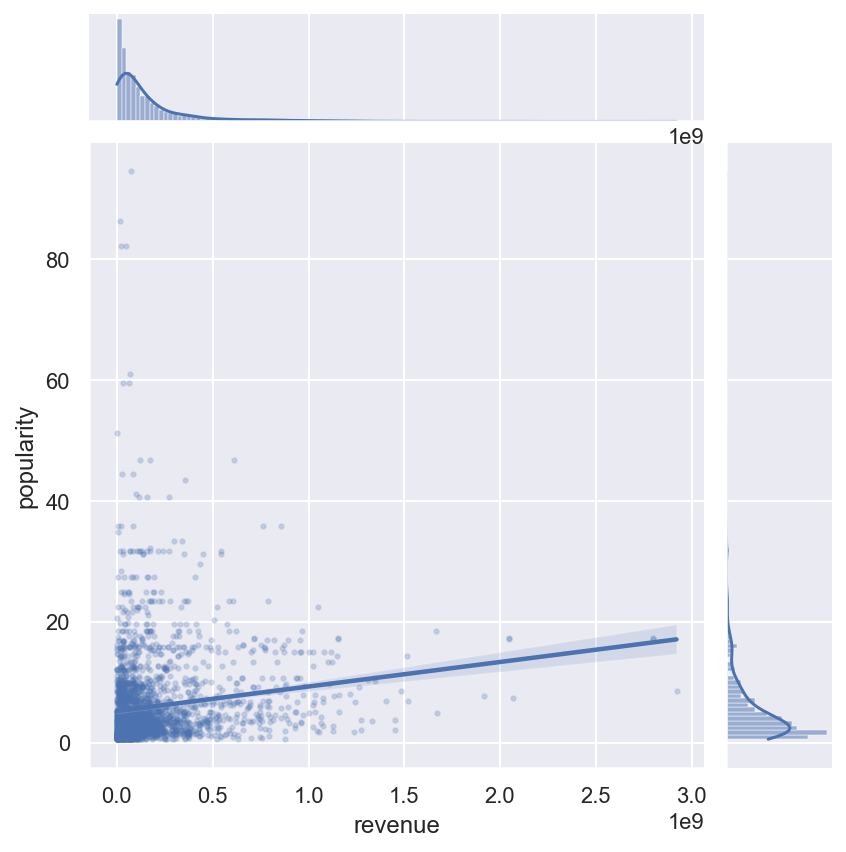

In [62]:
sns.jointplot(data=df_dir_pop_rev,x='revenue',y='popularity',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que la relación entre popularidad del director y el beneficio es casi nula.

In [63]:
df_dir_pop_rev[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.0000,0.1455
revenue,0.1455,1.0000


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section42"></a>
### <font color="#00586D"> 4.2 Reparto</font>
<br>


Una vez estudiado el papel del director, se procederá de igual manera con el reparto. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 8</font> 

Elaborar una gráfica `sns.jointplot()` para comprobar si existe correlación entre los ingresos de las películas y la popularidad de su reparto. El resultado de estas se debe almacenar en un *DataFrame* denominado `df_cast_pop_rev`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al anterior. Solo hay que cambiar el rol a `cast` y nombrar el *DataFrame* resultante `df_cast_pop_rev`. 

</details>  


In [64]:
df_credits_cast = df_credits.query('rol == "cast"')

In [65]:
df_cast_pop = pd.merge(df_credits_cast,df_people['popularity'],on='people_id',how='left')

In [66]:
df_cast_pop_rev = pd.merge(df_cast_pop,df_movies['revenue'],on='movie_id',how='right')

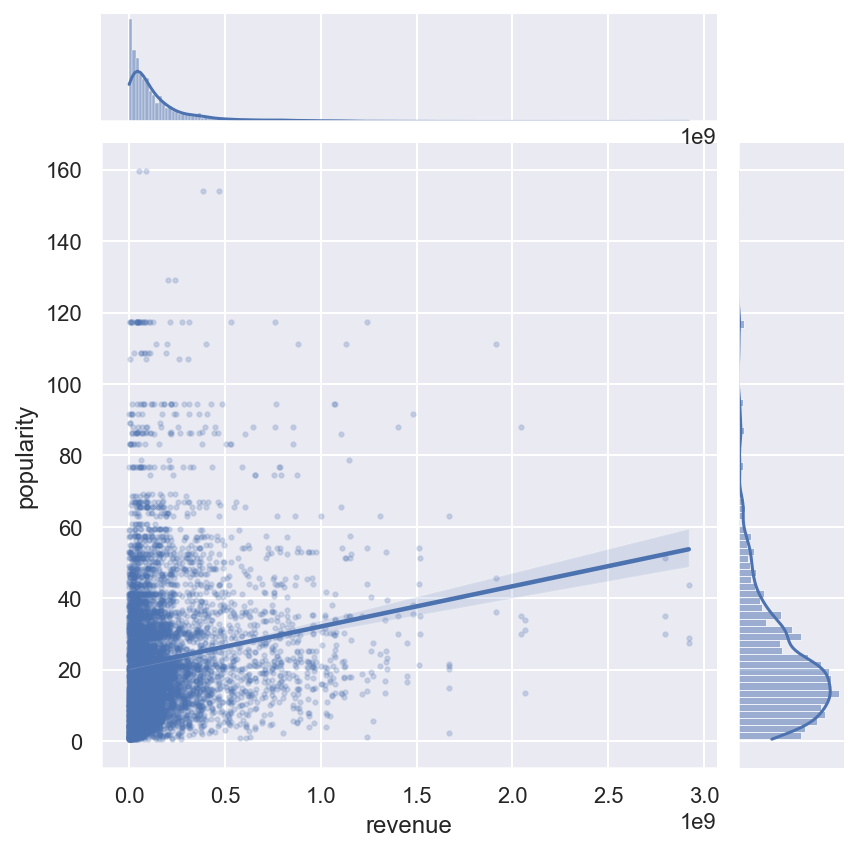

In [67]:
sns.jointplot(data=df_cast_pop_rev,x='revenue',y='popularity',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In [68]:
df_cast_pop_rev[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.000000,0.151211
revenue,0.151211,1.000000


Se aprecia también que, aunque influye positivamente, no es determinante porque casi es nula.


En definitiva, y según se aprecia en las gráficas, el principal factor en relación a la recaudación es el presupesto, mientras que otros como el director o los actores sean irrelevantes (salvo en casos muy específicos, se intuye).


Aunque podría profundizarse en el análisis, esto se hará posteriormente teniendo en cuenta el objetivo con el que se plantea la exploración.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Películas de bajo presupuesto</font>
<br>

En el objetivo de estudio que se ha establecido inicialmente, se parte de la base de que se dispone de un presupuesto limitado, por lo que se va a estudiar también la relación entre género e ingresos en este supuesto, considerando solamente aquellas películas cuyo presupuesto se encuentra en el 20% más bajo.

A continuación se almacenan las películas en las que se centrará el estudio (posteriores al año 2000 y de bajo presupuesto) en `df_movies_low`.

In [69]:
low_budget = df_movies['budget'].quantile(0.20)
df_movies_low = df_movies[df_movies['budget']<low_budget]
len(df_movies_low)

472

Aunque es algo que se puede gestionar "sobre la marcha", retener solamente las películas de interés en `df_genres` facilita las cosas. En este caso se seleccionan y se almacenan en `df_genres_low`.

In [70]:
df_genres_low = df_genres.loc[df_movies_low.index]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 9</font> 

Recalcular el orden de los géneros en función de la mediana los ingresos y construir una gráfica de cajas con los datos almacenados en el *DataFrame* `df_movies_low`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se trata de repetir el primer apartado del ejercicio 6, pero con `df_genres_low` y `df_movies_low`.

</details>  


In [71]:
ordered_genres = (
                    pd.merge(df_genres_low,df_movies_low['revenue'],on='movie_id',how='left')
                      .groupby('genre')['revenue'].mean()
                      .sort_values(ascending=False)
)
print(ordered_genres)

genre
Family         9.562335e+07
Horror         6.295876e+07
Mystery        6.116074e+07
Documentary    5.859712e+07
Thriller       5.168126e+07
Musical        4.846344e+07
Biography      4.812328e+07
News           4.624300e+07
War            4.582627e+07
Romance        4.476590e+07
Comedy         4.006262e+07
Action         3.706421e+07
History        3.545504e+07
Drama          3.508859e+07
Adventure      3.493709e+07
Crime          3.184034e+07
Sci-Fi         3.131324e+07
Music          3.057390e+07
Sport          2.708269e+07
Fantasy        2.406130e+07
Animation      1.940766e+07
Western        1.698466e+07
Name: revenue, dtype: float64


In [72]:
df_movies_low.head()

,title,avg_rating,num_votes,budget,revenue,popularity,release_date
movie_id,,,,,,,
tt0118694,In the Mood for Love,8.1,150051,150000.0,12854953,24.273,2000-09-29
tt0120679,Frida,7.3,90429,12000000.0,56298474,18.972,2002-08-29
tt0144084,American Psycho,7.6,611514,7000000.0,34266564,85.933,2000-04-13
tt0168629,Dancer in the Dark,7.9,110541,12800000.0,40031879,14.249,2000-06-30
tt0169102,Lagaan: Once Upon a Time in India,8.1,114818,5200000.0,8100000,7.497,2001-06-15


In [73]:
df_mov_gen_low = pd.merge(df_genres_low,df_movies_low['revenue'],on='movie_id',how='left')

<!--comment -->

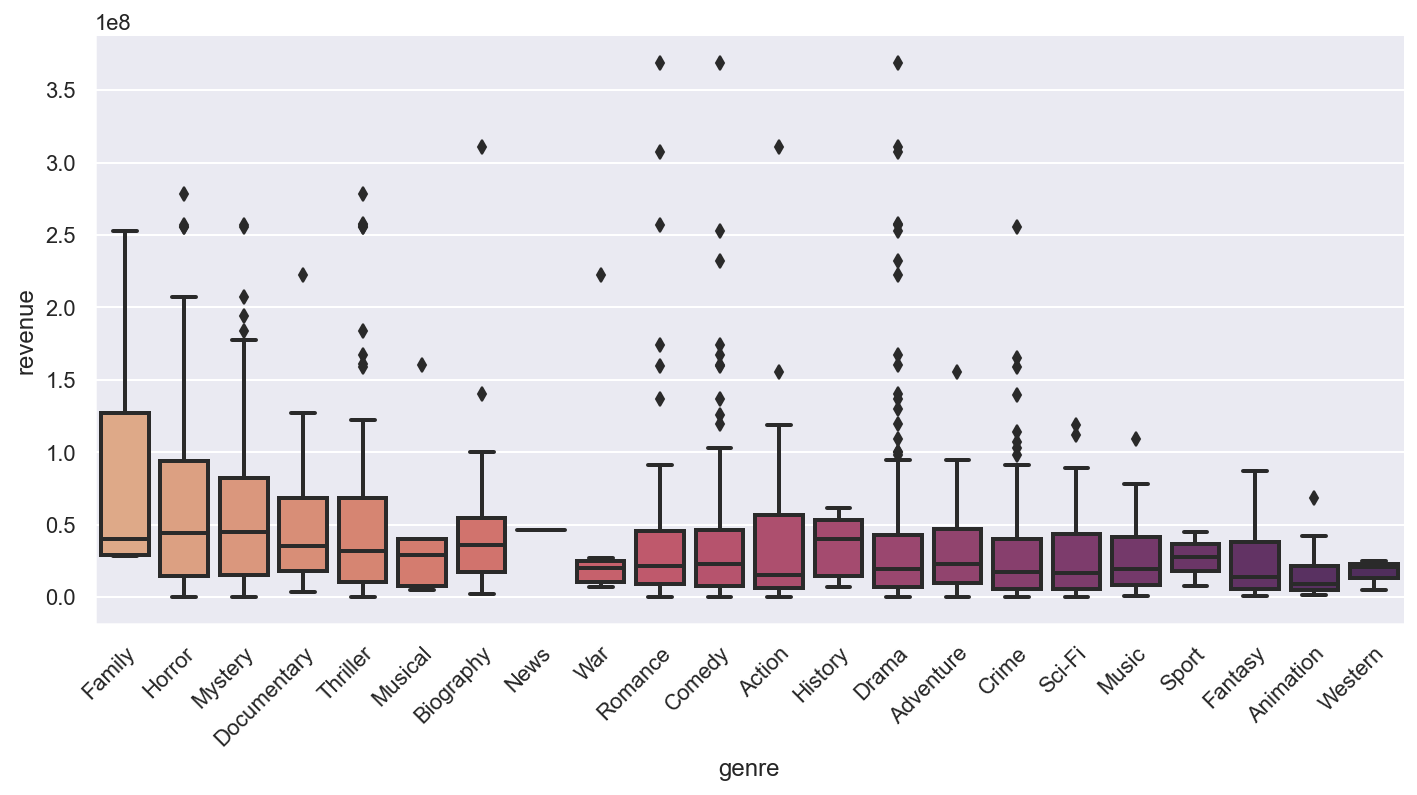

In [74]:
sns.catplot(x="genre", y="revenue", data=df_mov_gen_low, kind='box',order=ordered_genres.index, palette="flare",height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()


<!--comment -->

Puede apreciarse un cambio claro de tendencia. Cuando los prespuestos son relativamente bajos, géneros como el misterio y el terror pasan a ser más rentables.  También algún otro género como las noticias o historia. Llama también la atención que, géneros como la animación o fantasía, que son los más rentables en el caso general, no son rentables cuando los presupuestos son bajos.
<br>

Como los géneros más rentables son el terror, y el misterio (si se descartan las noticias, que solo hay una película), se seleccionarán las películas correspondientes a estos, además del _thriller_ (esta última por estar relacionada y mostrar también algunos valores altos) para estudiarlas en más profundidad. 



 Eliminar de `df_movies_low` las películas que no correspondan a los géneros `Horror`, `Thriller` o `Mystery`.
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En realidad se trata de seleccionar las filas de interés y guardar el resultado en `df_movies_low`.
* Se trata de hacer selección condicional con `Series.isin()` sobre `df_genres_low`. El resultado contiene los índices de las películas de interés. 
* Los *valores únicos* de este índice se pueden utilizar para acceder a las filas de `df_movies_low`.

</details>  


In [75]:
df_movies_low = df_movies_low.loc[df_genres_low[df_genres_low['genre'].isin(['Horror','Thriller','Mystery'])].index.unique()]
df_movies_low = df_movies_low.drop_duplicates()
df_movies_low.head()

,title,avg_rating,num_votes,budget,revenue,popularity,release_date
movie_id,,,,,,,
tt0144084,American Psycho,7.6,611514,7000000.0,34266564,85.933,2000-04-13
tt0181984,Boiler Room,7.0,53663,7000000.0,28780255,17.792,2000-02-18
tt0209144,Memento,8.4,1232381,9000000.0,39723096,32.570,2000-10-11
tt0211443,Jason X,4.4,57313,11000000.0,16951798,47.684,2001-11-09
tt0219699,The Gift,6.7,69992,10000000.0,12008642,31.863,2000-03-16


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Una vez reducido el conjunto de películas a las que resultan de interés para el contexto planteado, se obtendrán la lista de directores y actores ligados a una mayor recaudación. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 10</font> 

Crear un *DataFrame* denominado `best_directors_low` con los datos (`people_id`, `revenue`, `name`, `popularity` y `gender`) de los diez directores para los que la recaudación media de sus películas es mayor.


 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Este ejercicio implica obtener datos de los tres *DataFrame* 
* Hay que filtrar los créditos correspondientes a director
* El resultado se ha de fundir con `df_movies_low['revenue']` 
* El *DataFrame* resultante se ha de agrupar en función del `people_id` y obtener el valor medio de `revenue` 
* Se pueden obtener directamente las diez filas o elementos con mayor valor de `revenue`, y fundir el resultado con `df_people` para disponer también de los nombres y otros datos.
</details>  

In [76]:
df_dir_mov_low = pd.merge(df_credits_dir,df_movies_low['revenue'],on='movie_id',how='right')

In [77]:
df_dir_mov_low = df_dir_mov_low.groupby('people_id')['revenue'].mean()

In [78]:
df_dir_mov_low = df_dir_mov_low.nlargest(10)

In [79]:
df_dir_mov_low = df_dir_mov_low.to_frame('revenue')

In [80]:
best_directors_low = pd.merge(df_people,df_dir_mov_low,on='people_id',how='right')
best_directors_low = best_directors_low[['revenue','name','popularity','gender']]

best_directors_low

,revenue,name,popularity,gender
people_id,,,,
26714,257047661.0,John R. Leonetti,3.716,2
64141,255614941.0,David Gordon Green,12.051,2
291263,255407969.0,Jordan Peele,12.006,2
90591,194183034.0,Oren Peli,1.177,2
11614,188452210.0,M. Night Shyamalan,12.368,2
20310,183474602.0,Takashi Shimizu,3.617,2
20133,177512032.0,Tod Williams,1.658,2
142272,174928918.0,Henry Joost,1.522,2
142276,174928918.0,Ariel Schulman,3.156,2


<!--comment -->

Crear una gráfica de barras (horizontal) con los valores `revenue` para cada director en `best_directors_low`.

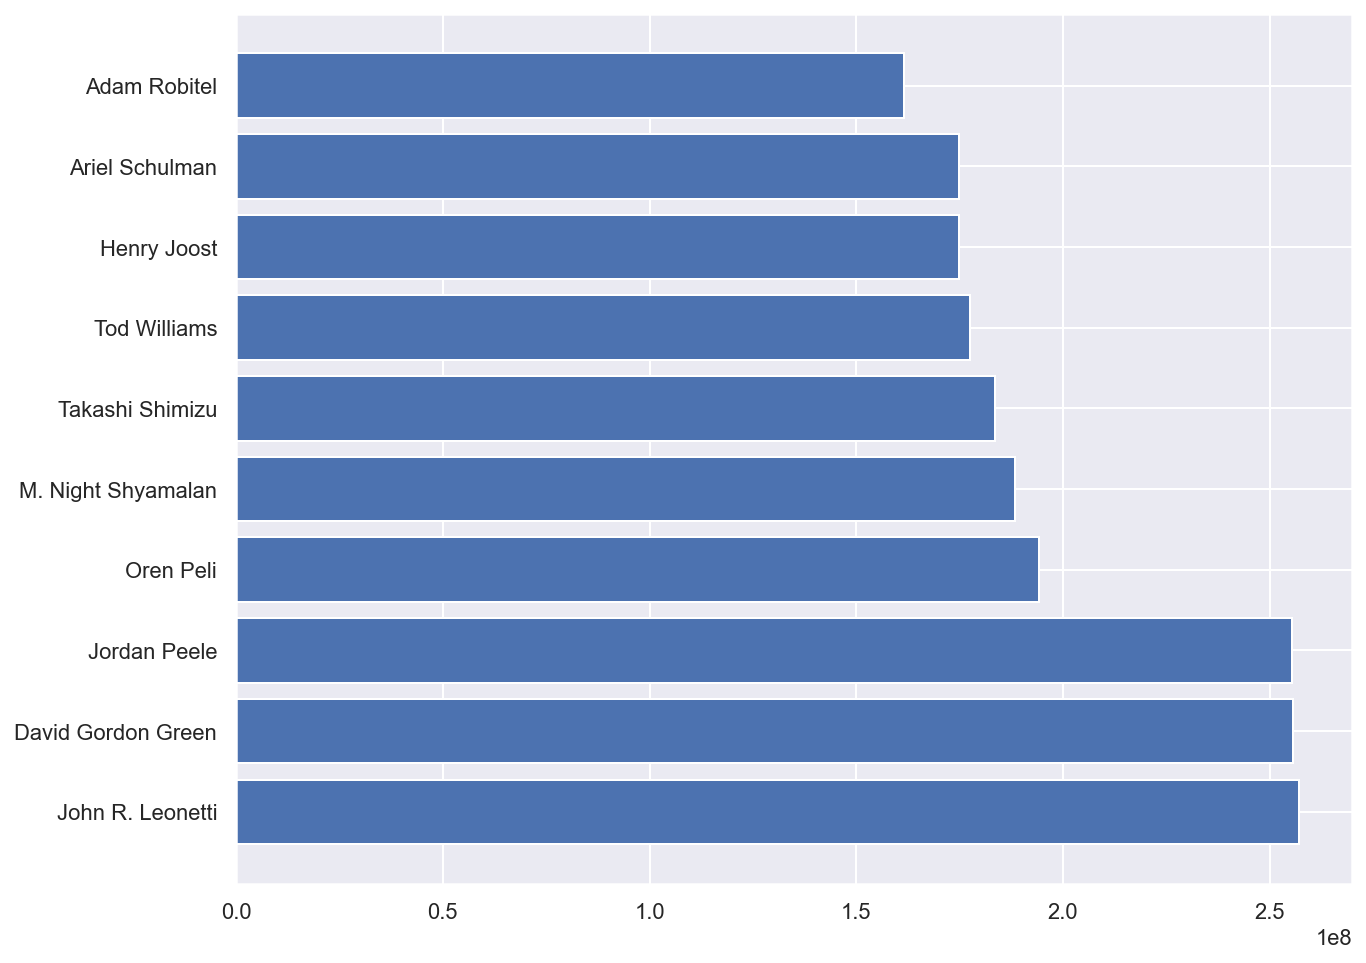

In [81]:
plt.figure(figsize=(10,8))
plt.barh(best_directors_low['name'],best_directors_low['revenue'])
plt.show()

<!--comment -->

A continuación se muestra la película del director que ha obtenido más beneficios que, según parece, también es protagonista de la película.

In [82]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Créditos de las películas de ese director y que estén en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Películas
df_movies.loc[movies_bd]

,title,avg_rating,num_votes,budget,revenue,popularity,release_date
movie_id,,,,,,,
tt3322940,Annabelle,5.4,160448,6500000.0,257047661,85.045,2014-10-02


Podemos mostrar el cartel de la película que ha catapultado al éxito (al menos económico) a este director.

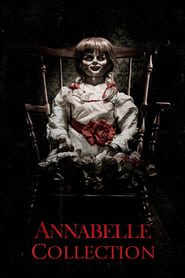

In [83]:
from IPython.display import Image

Image('http://image.tmdb.org/t/p/w185//8ouiyGYcv3E1JPrPrC7pLjxlDhC.jpg')

Un modo quizá más justo de calcular la rentabilidad de una película es el ratio `revenue`/`budget` (para obtener este dato, es necesario considerar solamente las películas con `revenue>0` y `budget>0`, pero en primer apartado se eliminaron las que no cumplían la condición). Obtener los 10 directores que han generado un mayor beneficio según este criterio. 

  
Mostrar una gráfica, similar a la anterior, con esta información. En lugar de utilizar `revenue`, hay que calcular primero una nueva columna, denominada `rent` con la beneficio/presupuesto, y mostrar los datos corrspondientes a esta nueva columna.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se trata de ***repetir*** el primer apartado del ejercicio, pero creando una nueva columna denominada `df_movies_low['rent']` el ratio entre recaudación y presupuesto, y utilizando  esta columna para crear otra vez `best_directors_low`.
</details>  

In [84]:
df_movies_low=df_movies_low.assign(rent=lambda x: x.revenue/x.budget)

In [85]:
df_dir_mov_low = pd.merge(df_credits_dir,df_movies_low['rent'],on='movie_id',how='right')
df_dir_mov_low = df_dir_mov_low.groupby('people_id')['rent'].mean()
df_dir_mov_low = df_dir_mov_low.nlargest(10)
df_dir_mov_low = df_dir_mov_low.to_frame('rent')
df_dir_mov_low.head()

,rent
people_id,
90591,903.176902
640,420.522723
76624,77.919429
1932296,75.462037
86688,62.882090


In [86]:
best_directors_low = pd.merge(df_people,df_dir_mov_low,on='people_id',how='right')
best_directors_low = best_directors_low[['rent','name','popularity','gender']]

best_directors_low

,rent,name,popularity,gender
people_id,,,,
90591,903.176902,Oren Peli,1.177,2
640,420.522723,Chris Kentis,1.400,2
76624,77.919429,Shane Carruth,0.840,2
1932296,75.462037,Aneesh Chaganty,0.828,2
86688,62.882090,Levan Gabriadze,1.400,2
2127,61.155275,James Wan,14.339,2
20133,59.170677,Tod Williams,1.658,2
291263,56.757326,Jordan Peele,12.006,2
26714,39.545794,John R. Leonetti,3.716,2


<!--comment -->

Crear una gráfica de barras (horizontal) con los valores `rent` para cada director en `best_directors_low`.

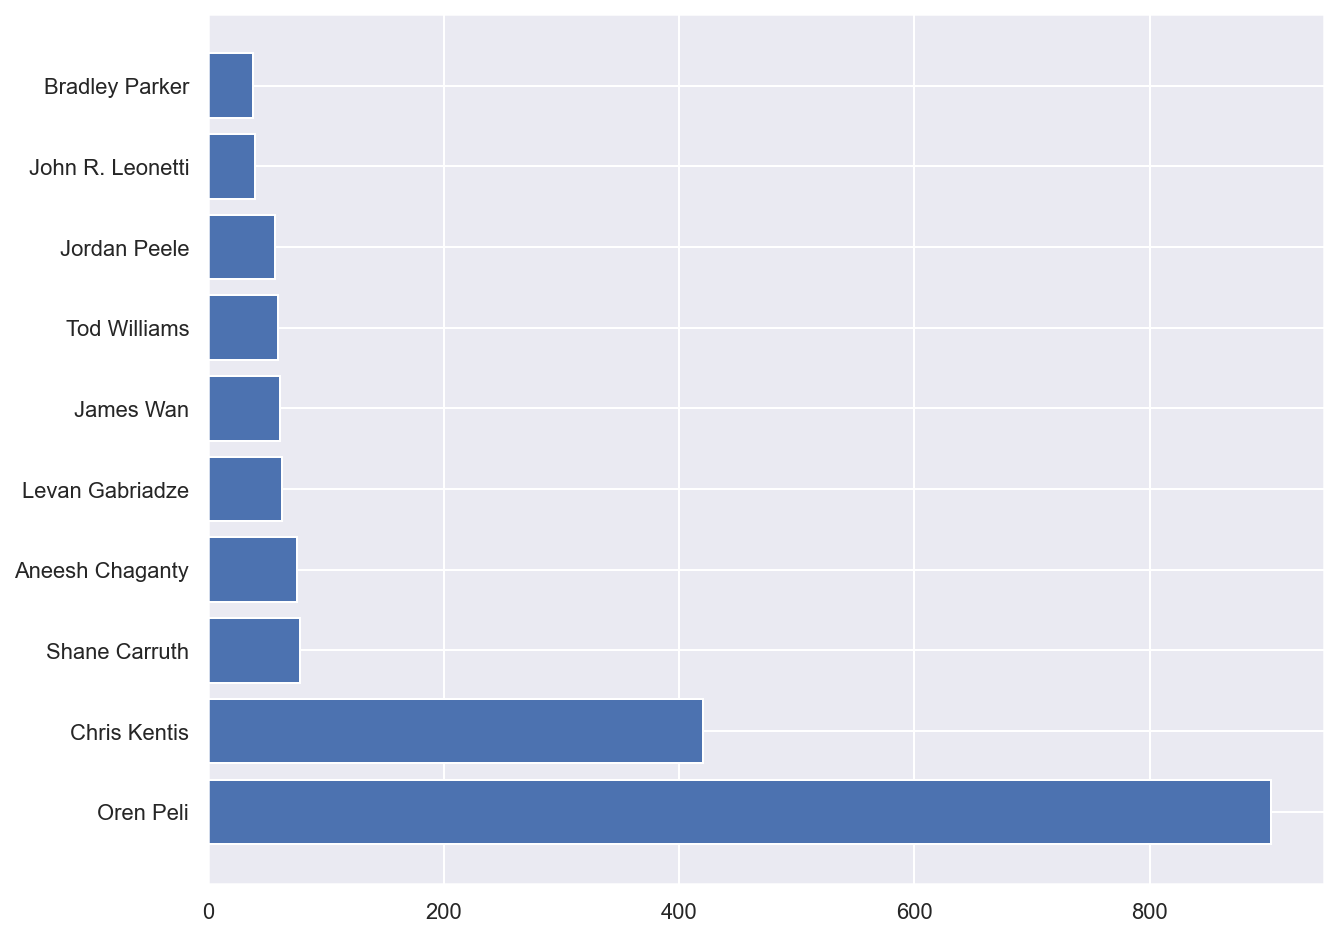

In [87]:
plt.figure(figsize=(10,8))
plt.barh(best_directors_low['name'],best_directors_low['rent'])
plt.show()

<!--comment -->

En este sentido, hay un director y película que destaca sobre muy por encima de los demás.  

,title,avg_rating,num_votes,budget,revenue,popularity,release_date
movie_id,,,,,,,
tt1179904,Paranormal Activity,6.3,241286,215000.0,194183034,89.234,2007-09-14


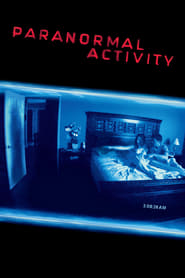

In [88]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Créditos de las películas de ese director y que estén en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Películas
display(df_movies.loc[movies_bd])

Image('http://image.tmdb.org/t/p/w185/1bjA7de4O0NhMsaOqwvrecophUs.jpg')

Una vez estudiados los directores, procederemos a estudiar el reparto.  En este caso, se comenzará qué actores o actrices participan en películas con más ingresos.  


 Obtener los nombres de los 20 actores/actrices cuyas películas generan, por término medio, una mayor cantidad de ingresos. Almacenar el resultado en un *DataFrame* denominado `best_cast_low`.
 
 
  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al anterior, pero hay que cambiar el `rol` y seleccionar las entradas correspondientes a `cast`. 
</details>  
  


In [89]:
df_cast_mov_low = (
                    pd.merge(df_credits_cast,df_movies_low['revenue'],on='movie_id',how='right')
                      .groupby('people_id')['revenue'].mean()
                      .nlargest(20)
                      .to_frame('revenue')
)

df_cast_mov_low.head()


,revenue
people_id,
5530,278454358.0
52462,278454358.0
115290,257591776.0
556435,257591776.0
34842,257047661.0


In [90]:
best_cast_low = pd.merge(df_people,df_cast_mov_low,on='people_id',how='right')
best_cast_low = best_cast_low[['revenue','name','popularity','gender']]

best_cast_low

,revenue,name,popularity,gender
people_id,,,,
5530,278454358.0,James McAvoy,36.130,2
52462,278454358.0,Betty Buckley,4.241,1
115290,257591776.0,Lee Sun-kyun,7.180,2
556435,257591776.0,Cho Yeo-jeong,14.593,1
34842,257047661.0,Tony Amendola,5.333,2
82809,257047661.0,Annabelle Wallis,34.983,1
94436,257047661.0,Ward Horton,5.232,2
8944,255614941.0,Jamie Lee Curtis,21.423,1
20750,255614941.0,Judy Greer,29.080,1


<!--comment -->

Crear una gráfica de barras (horizontal) con los valores `revenue` para cada director en `best_cast_low`.

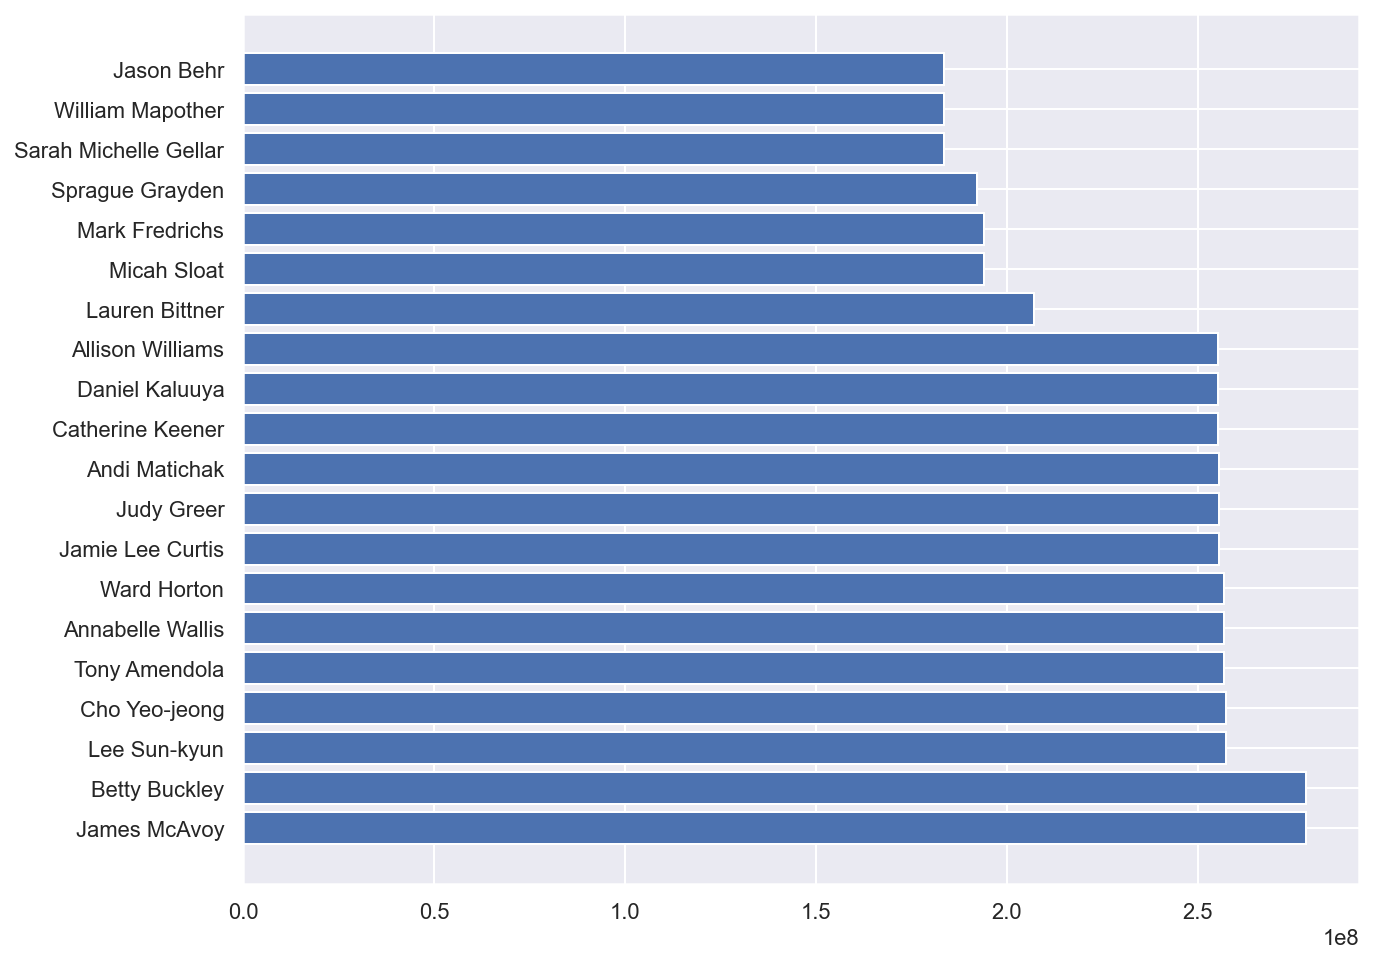

In [91]:
plt.figure(figsize=(10,8))
plt.barh(best_cast_low['name'],best_cast_low['revenue'])
plt.show()

<!--comment -->

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

En ejercicio anterior se muestra un reparto más o menos equitativo entre actores y actrices para los 10 miembros del reparto que están ligados a mayor beneficio.  Sin embargo, se estudiará algo más este factor (género).

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 11</font> 

Crear un *DataFrame* denominado `cast_low`, similar al anterior, con el beneficio medio (`revenue`) asociado a cada actor, su nombre (`name`), popularidad (`popularity`) y género (`gender`). 


 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Es similar al anterior, pero en lugar de acceder a los mayores valores, se devuelven todos las filas.
</details>  

In [92]:
cast_low = (
                    pd.merge(df_credits_cast,df_movies_low['revenue'],on='movie_id',how='right')
                      .groupby('people_id')['revenue'].mean()
                      .to_frame('revenue')
                      
)

cast_low = pd.merge(df_people,cast_low,on='people_id',how='right')
cast_low = cast_low[['revenue','name','popularity','gender']]
cast_low

,revenue,name,popularity,gender
people_id,,,,
34,118587880.0,Mykelti Williamson,14.914,2
49,148868835.0,Maria Bello,20.875,1
63,47709193.0,Milla Jovovich,28.979,1
100,82391145.0,Scott Speedman,20.602,2
112,12008642.0,Cate Blanchett,18.590,1
...,...,...,...,...
2037046,1088907.0,Souheila Yacoub,3.065,1
2041838,1088907.0,Romain Guillermic,0.602,2
2048372,51749995.0,Diana Silvers,13.341,1


A partir del *DataFrame* `cast_low`, obtener un gráfico de barras mostrando el número actores de cada género.

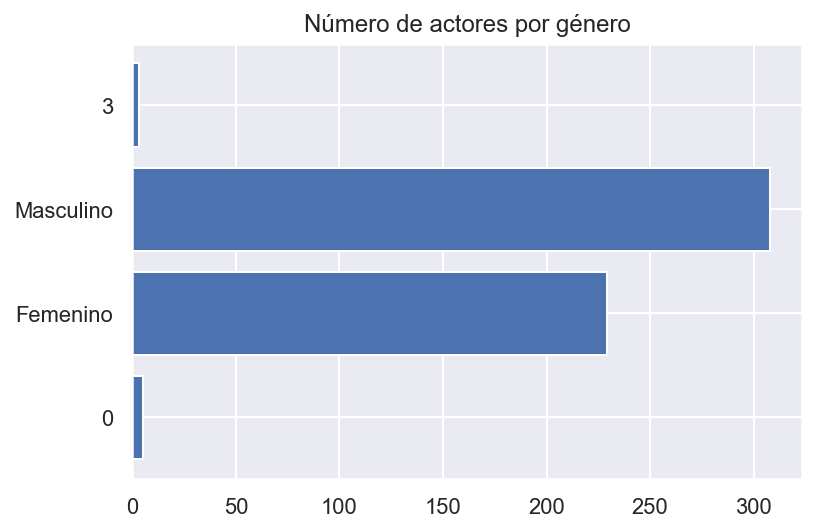

In [93]:
generos = cast_low.groupby('gender')['name'].count()
fig, ax = plt.subplots()
ax.barh(range(len(generos)), generos.values, tick_label=generos.index)
ax.set_title('Número de actores por género')
ax.set_yticklabels(['0','Femenino','Masculino','3'])
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se aprecia que el número de actores es mayor que el de actrices. Cabe preguntarse si hay algún tipo de diferencia en la recaudación vinculada al género de los actores. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 12</font> 

Mostrar la distribución de `cast_low` para los géneros 1 (mujer) y 2 (hombre). 

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer un `sns.displot` con `cast_low` filtrando previamente por género para que solo contemple esos dos (mayoritarios).
* El color se puede utilizar para distinguir ambas distribuciones.    
</details>  

In [124]:
cast_low.head()

,revenue,name,popularity,gender
people_id,,,,
34,118587880.0,Mykelti Williamson,14.914,2
49,148868835.0,Maria Bello,20.875,1
63,47709193.0,Milla Jovovich,28.979,1
100,82391145.0,Scott Speedman,20.602,2
112,12008642.0,Cate Blanchett,18.590,1


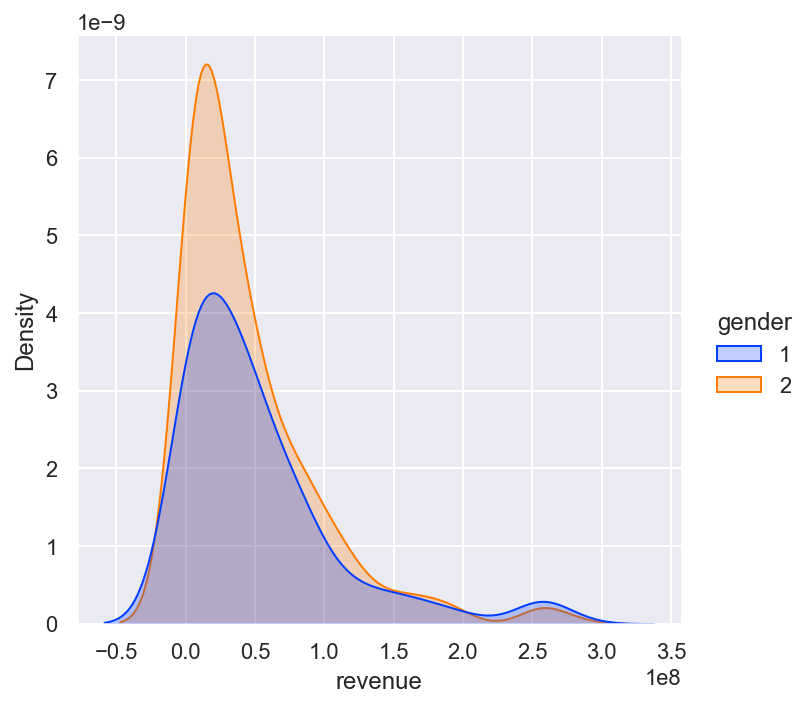

In [155]:
sns.displot(data=cast_low.query('gender == 1|gender == 2'),x='revenue', hue='gender', kind='kde', fill=True, palette=sns.color_palette('bright', n_colors=2))
plt.show()

<!--comment -->

En principio se aprecia alguna diferencia en las distribuciones, pero no está claro que haya una diferencia en la recaudación media. Se puede verificar este hecho mediante un test U de Mann-Whitney. Si fijamos un nivel de significancia del 95% ¿puede afirmarse que son iguales los sueldos medios?

In [117]:
grupo_1 = cast_low.query('gender == 1')
grupo_2 = cast_low.query('gender == 2')

In [126]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(grupo_1['revenue'], grupo_2['revenue'])
print(f'stat={stat:.3f}, p={p:.3f}')

stat=37239.000, p=0.267


`Comentar el resultado (contestar a las preguntas) en esta celda`

El resultado del test nos indica que no hay una diferencia significativa entre los sueldos medios de actores y actrices, con lo que podríamos decir que son iguales. Es posible que haya una diferencia entre los sueldos medios, pero esa diferencia es demasiado pequeña para considerarse estadísticamente significativa.
<br><br><br>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se percibe que, a pesar de que aparecen más actores que actrices, parece que en las películas con los beneficios más altos no hay diferencia o incluso aparecen más actrices que actores.  El test refleja que en general no hay diferencias en las recaudaciones de las películas en que participan unos y otros.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Conclusión</font>
<br>

En este trabajo se partía de dos bases de datos de películas y gente, y el objetivo era estudiar qué factores están más relacionados con el éxito de una película, que se mide por los ingresos que genera. Desde el principio, ha quedado claro que el presupuesto es el factor más importante,  que los géneros en que más dinero se gasta en la producción son la animación, fantasía, etc., y que éstos son también los que más recaudación obtienen.  También se ha comprobado que la información relativa a popularidad de directores y actores __no__ parece un factor muy relevante. 
<br>

No obstante se ha limitado el estudio al periodo actual y al (relativamente bajo) presupuesto disponible. En ese sentido, se ha comprobado que las películas más rentables son aquellas que pertenecen a los géneros de terror, suspense, etc. También se ha descubierto que películas como "Paranormal Activity" generan unos ingresos extraordinariamente altos en proporción con la inversión.  
<br>


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>